<a href="https://colab.research.google.com/github/TimH2024/MSC-M5-Project/blob/main/LSTM_Model_M5ver4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPU Usage

In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


In [4]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [5]:
#Installing libraries
!pip install tensorflow
!pip install scikeras

# LOAD LIBRARIES

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # XGBoost
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor  # Correct import
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # XGBoost
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # XGBoost
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor  # Correct import
from scipy.stats import uniform, randint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor  # XGBoost
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
# Best parametr based on tuning for XGBoost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb


In [7]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date and Time Utilities
from datetime import datetime

# Machine Learning - Model Selection and Preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Machine Learning - Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Metrics for Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Deep Learning with Keras and TensorFlow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor  # Wrapper for Keras models

# Statistical Analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Hyperparameter Tuning
from scipy.stats import uniform, randint

# Supress user warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Read in the data sets
dataset = pd.read_csv('/content/Datasetv2.csv')
property_dataset = pd.read_csv('/content/Property_data_raw_2.csv')

# Quick Look at the two property datasets

# PROPERTY DATASET

Quick look at the dataset provided by Centaline Properties (essentially a list of 156,000 property transactions in Hong Kong over a period of 3 years)

In [9]:
dataset.head(20)

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,Phase,Block,Rental,Public Housing,floor
0,0,9/3/2023,"The Long Beach, Tower 7, Middle Floor, Flat D",33000,--,816,40,Kowloon Kowloon City District,7,D,NaN,NaN,True,False,13.0
1,1,9/3/2023,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",15800,--,375,42,Kowloon Kowloon City District,3,H,NaN,NaN,True,False,22.0
2,2,8/3/2023,"Sky Tower, Block 1, Lower Floor, Flat B",18800,--,520,36,Kowloon Kowloon City District,NaN,B,NaN,1,True,False,7.0
3,3,8/3/2023,"Hampton Place, Tower 2, Upper Floor, Flat F",17000,--,429,40,Kowloon Kowloon City District,2,F,NaN,NaN,True,False,22.0
4,4,8/3/2023,"Skypark, Upper Floor, Flat A5",18000,--,407,44,Kowloon Kowloon City District,NaN,A,NaN,NaN,True,False,22.0
5,5,8/3/2023,"Eltanin Square Mile, Tower 1, Upper Floor, Flat G",14300,--,255,56,Kowloon Kowloon City District,1,G,NaN,NaN,True,False,22.0
6,6,8/3/2023,"Cetus Square Mile, Tower 1, Lower Floor, Flat G",12000,--,194,62,Kowloon Kowloon City District,1,G,NaN,NaN,True,False,7.0
7,7,8/3/2023,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,2,NaN,False,False,22.0
8,8,8/3/2023,"Metro Harbour View, Phase 1, Tower 3, Upper Fl...",16000,--,386,41,Kowloon Kowloon City District,3,B,1,NaN,True,False,22.0
9,9,8/3/2023,"Celestial Heights, Phase 2, 22 Celestial Avenu...",38000,--,"1,155",33,Kowloon Kowloon City District,NaN,NaN,2,NaN,True,False,13.0


In [10]:
dataset.shape

(159676, 15)

In [11]:
dataset.columns

Index(['Unnamed: 0', 'date', 'address', 'price', 'changes',
       'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat',
       'Phase', 'Block', 'Rental', 'Public Housing', 'floor'],
      dtype='object')

In [12]:
# Check data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           159676 non-null  int64  
 1   date                 159676 non-null  object 
 2   address              159676 non-null  object 
 3   price                159676 non-null  int64  
 4   changes              159676 non-null  object 
 5   saleable_area(ft^2)  159676 non-null  object 
 6   unit_rate            159676 non-null  int64  
 7   district             159676 non-null  object 
 8   Tower                60395 non-null   object 
 9   Flat                 152252 non-null  object 
 10  Phase                48336 non-null   object 
 11  Block                54679 non-null   object 
 12  Rental               159676 non-null  bool   
 13  Public Housing       159676 non-null  bool   
 14  floor                159676 non-null  float64
dtypes: bool(2), float

# MARCO INDICIES DATASET

Quick look at the macro economic indicies dataset which contains indicators that could impact the change in property prices. The information is based on statistics provided by the Government of Hong Kong

In [13]:
property_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15 non-null     object 
 1   2020Q1      15 non-null     float64
 2   2020Q2      15 non-null     float64
 3   2020Q3      15 non-null     float64
 4   2020Q4      15 non-null     float64
 5   2021Q1      15 non-null     float64
 6   2021Q2      15 non-null     float64
 7   2021Q3      15 non-null     float64
 8   2021Q4      15 non-null     float64
 9   2022Q1      15 non-null     float64
 10  2022Q2      15 non-null     float64
 11  2022Q3      15 non-null     float64
 12  2022Q4      15 non-null     float64
 13  2023Q1      15 non-null     float64
 14  2023Q2      15 non-null     float64
 15  2023Q3      15 non-null     float64
 16  2023Q4      15 non-null     float64
dtypes: float64(16), object(1)
memory usage: 2.1+ KB


In [14]:
property_dataset.shape

(15, 17)

In [15]:
# Create a dictionary of descriptions
descriptions = {
    'CPI': 'Consumer Price Index',
    'IR': 'Interest Rate',
    'MW': 'Monthly Wage',
    'M3': 'Money Supply M3',
    'SD': 'Savings Deposit',
    'UR': 'Unemployment Rate',
    'GDP': 'Gross Domestic Product',
    'CI': 'Consumer Confidence Index',
    'SM': 'Stock Market',
    'LTV': 'Loan to Value',
    'HS': 'Housing Starts',
    'SOLD': 'Number of Properties Sold',
    'PG': 'Population Growth',
    'CG': 'China Growth',
    'PI': 'Property price changes'
}

# Map /add descriptions to the dataset_datasetFrame
property_dataset['Description'] = property_dataset['Unnamed: 0'].map(descriptions)

# Display the updated dataset_datasetFrame
property_dataset.head(20)

,Unnamed: 0,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1,2023Q2,2023Q3,2023Q4,Description
0,CPI,0.80,0.80,0.80,0.80,0.90,0.90,0.90,0.90,1.80,1.80,1.80,1.80,2.00,2.00,2.00,2.00,Consumer Price Index
1,IR,2.00,0.86,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.75,2.00,3.50,4.75,5.50,5.75,5.75,Interest Rate
2,MW,17.00,17.00,17.10,16.90,16.80,17.00,17.20,17.20,17.10,17.30,17.50,17.60,17.70,18.00,18.30,18.40,Monthly Wage
3,M3,14.80,14.90,15.90,15.60,15.90,16.00,16.00,16.20,16.50,16.30,16.30,16.40,16.50,16.50,16.80,17.10,Money Supply M3
4,SD,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.08,0.08,0.08,0.08,0.08,Savings Deposit
5,UR,3.70,5.90,6.20,6.20,7.20,6.00,4.60,4.10,4.50,5.10,4.10,3.70,3.30,3.00,2.90,2.90,Unemployment Rate
6,GDP,86.24,86.24,86.24,86.24,92.23,92.23,92.23,92.23,89.96,89.96,89.96,89.96,91.40,91.40,91.40,91.40,Gross Domestic Product
7,CI,62.90,52.30,59.80,63.80,66.60,66.80,68.00,63.40,50.60,53.70,43.90,28.30,66.10,61.00,52.60,51.00,Consumer Confidence Index
8,SM,27.90,24.20,25.10,26.50,28.90,29.10,24.80,23.99,21.91,20.72,17.75,19.90,20.58,19.45,17.95,17.45,Stock Market
9,LTV,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,Loan to Value


# Merge both datasets and switch around columns of the macro economic indicies dataset

In [16]:
# Merge datasets and pivot
# Add year quarter and time stamp

from datetime import datetime
import pandas as pd

# Define the function to convert date to year-quarter format and add a timestamp
def get_year_quarter(date_str):
    date_formats = ['%d-%m-%y', '%d/%m/%y', '%Y-%m-%d', '%m/%d/%y', '%d.%m.%Y', '%d-%m-%Y', '%d/%m/%Y']
    for fmt in date_formats:
        try:
            date = datetime.strptime(date_str, fmt)
            year = date.year
            quarter = (date.month - 1) // 3 + 1
            timestamp = date.strftime('%Y-%m-%d %H:%M:%S')  # Add timestamp in standard format
            return date.strftime('%d-%m-%y'), f"{year}Q{quarter}", timestamp
        except ValueError:
            continue
    raise ValueError(f"Date format not recognized: {date_str}")

# Extract date, quarter info, and timestamp from the dataset
dataset[['date', 'YearQuarter', 'timestamp']] = dataset['date'].apply(lambda x: pd.Series(get_year_quarter(x)))

# Melt the property data to have a long format
property_dataset_melted = property_dataset.melt(id_vars=[property_dataset.columns[0]], var_name='YearQuarter', value_name='Value')

# Pivot the melted property data to have a wide format
property_dataset_pivoted = property_dataset_melted.pivot(index='YearQuarter', columns=property_dataset.columns[0], values='Value').reset_index()

# Merge the datasets on the YearQuarter column
merged_dataset = pd.merge(dataset, property_dataset_pivoted, on='YearQuarter', how='left')

# Save the merged dataset to a new CSV file
merged_dataset.to_csv('Merged_Datasetv2.csv', index=False)

In [17]:
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the function to convert date to year-quarter format and add a Unix timestamp
def get_year_quarter(date_str):
    date_formats = ['%d-%m-%y', '%d/%m/%y', '%Y-%m-%d', '%m/%d/%y', '%d.%m.%Y', '%d-%m-%Y', '%d/%m/%Y']
    for fmt in date_formats:
        try:
            date = datetime.strptime(date_str, fmt)
            year = date.year
            quarter = (date.month - 1) // 3 + 1
            # Generate Unix timestamp
            unix_timestamp = int(date.timestamp())  # Converts to seconds since epoch
            return date.strftime('%d-%m-%y'), f"{year}Q{quarter}", unix_timestamp
        except ValueError:
            continue
    raise ValueError(f"Date format not recognized: {date_str}")

# Extract date, quarter info, and Unix timestamp from the dataset
dataset[['date', 'YearQuarter', 'unix_timestamp']] = dataset['date'].apply(lambda x: pd.Series(get_year_quarter(x)))

# Scale the Unix timestamp for LSTM
scaler = MinMaxScaler()
dataset['scaled_unix_timestamp'] = scaler.fit_transform(dataset[['unix_timestamp']])

# Melt the property data to have a long format
property_dataset_melted = property_dataset.melt(id_vars=[property_dataset.columns[0]], var_name='YearQuarter', value_name='Value')

# Pivot the melted property data to have a wide format
property_dataset_pivoted = property_dataset_melted.pivot(index='YearQuarter', columns=property_dataset.columns[0], values='Value').reset_index()

# Merge the datasets on the YearQuarter column
merged_dataset = pd.merge(dataset, property_dataset_pivoted, on='YearQuarter', how='left')

# Save the merged dataset to a new CSV file
merged_dataset.to_csv('Merged_Datasetv2.csv', index=False)

# MERGED DATASET

In [18]:
merged_dataset.shape

(159676, 34)

In [19]:
# Look at the data types in the merged_database
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159676 entries, 0 to 159675
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             159676 non-null  int64  
 1   date                   159676 non-null  object 
 2   address                159676 non-null  object 
 3   price                  159676 non-null  int64  
 4   changes                159676 non-null  object 
 5   saleable_area(ft^2)    159676 non-null  object 
 6   unit_rate              159676 non-null  int64  
 7   district               159676 non-null  object 
 8   Tower                  60395 non-null   object 
 9   Flat                   152252 non-null  object 
 10  Phase                  48336 non-null   object 
 11  Block                  54679 non-null   object 
 12  Rental                 159676 non-null  bool   
 13  Public Housing         159676 non-null  bool   
 14  floor                  159676 non-nu

# DATASET REVIEW

#Data Analysis: Looking at the number of null values for each column

In [20]:
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)

Number of null values for each column:
Unnamed: 0                    0
date                          0
address                       0
price                         0
changes                       0
saleable_area(ft^2)           0
unit_rate                     0
district                      0
Tower                     99281
Flat                       7424
Phase                    111340
Block                    104997
Rental                        0
Public Housing                0
floor                         0
YearQuarter                   0
timestamp                     0
unix_timestamp                0
scaled_unix_timestamp         0
CG                            0
CI                            0
CPI                           0
GDP                           0
HS                            0
IR                            0
LTV                           0
M3                            0
MW                            0
PG                            0
PI                            0
S

In [21]:
# Quickly checking the merged dataset
merged_dataset.head(50)

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,...,IR,LTV,M3,MW,PG,PI,SD,SM,SOLD,UR
0,0,09-03-23,"The Long Beach, Tower 7, Middle Floor, Flat D",33000,--,816,40,Kowloon Kowloon City District,7,D,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
1,1,09-03-23,"One Kai Tak, II, Tower 3, Upper Floor, Flat H",15800,--,375,42,Kowloon Kowloon City District,3,H,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
2,2,08-03-23,"Sky Tower, Block 1, Lower Floor, Flat B",18800,--,520,36,Kowloon Kowloon City District,NaN,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
3,3,08-03-23,"Hampton Place, Tower 2, Upper Floor, Flat F",17000,--,429,40,Kowloon Kowloon City District,2,F,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
4,4,08-03-23,"Skypark, Upper Floor, Flat A5",18000,--,407,44,Kowloon Kowloon City District,NaN,A,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
5,5,08-03-23,"Eltanin Square Mile, Tower 1, Upper Floor, Flat G",14300,--,255,56,Kowloon Kowloon City District,1,G,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
6,6,08-03-23,"Cetus Square Mile, Tower 1, Lower Floor, Flat G",12000,--,194,62,Kowloon Kowloon City District,1,G,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
7,7,08-03-23,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
8,8,08-03-23,"Metro Harbour View, Phase 1, Tower 3, Upper Fl...",16000,--,386,41,Kowloon Kowloon City District,3,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
9,9,08-03-23,"Celestial Heights, Phase 2, 22 Celestial Avenu...",38000,--,"1,155",33,Kowloon Kowloon City District,NaN,NaN,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3


In [22]:
# Check the number of duplicated rows
duplicates_count = merged_dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_count}")

# Remove duplicate rows
merged_dataset.drop_duplicates(inplace=True)

# Shape of the DataFrame after removing duplicates
merged_dataset.shape

Number of duplicate rows: 0


(159676, 34)

# How many properties sold were are Public Housing" as opposed to private housing

In [23]:
# Count the number of rows where 'Public Housing' is True
true_count = merged_dataset['Public Housing'].sum()

print("Number of True rows in 'Public Housing':", true_count)

Number of True rows in 'Public Housing': 1554


# Removing  'Rental' and 'Public Housing'


In [24]:
# Check the shape of the dataset before deleting rows where 'Rental' is True
print("Shape before deletion:", merged_dataset.shape)

# Delete rows where 'Rental' is True
merged_dataset = merged_dataset[merged_dataset['Public Housing'] != True]

# Check the shape of the dataset after deletion
print("Shape after deletion:", merged_dataset.shape)

# Count the number of rows where 'Public Housing' is True (i.e., properties sold that are Public Housing)
public_housing_count = merged_dataset['Public Housing'].sum()

print("Number of properties sold that are Public Housing:", public_housing_count)

Shape before deletion: (159676, 34)
Shape after deletion: (158122, 34)
Number of properties sold that are Public Housing: 0


In [25]:
# How any rows in the dataset are Rental properties = True (this means they are rental properties)

# Count the number of rows where 'Rental' is True
true_count = merged_dataset['Rental'].sum()

print("Number of True rows in 'Rental':", true_count)
# We need to delete these as we are focusing on property purchase

Number of True rows in 'Rental': 48234


In [26]:
# Count the number of rows where 'Rental' is True (i.e., rental properties)
rental_count = merged_dataset['Rental'].sum()

print("Number of True rows in 'Rental' (Rental properties):", rental_count)

# Check the shape of the dataset before deleting rows where 'Rental' is True
print("Shape before deletion:", merged_dataset.shape)

# Delete rows where 'Rental' is True
merged_dataset = merged_dataset[merged_dataset['Rental'] != True]

# Check the shape of the dataset after deletion
print("Shape after deletion:", merged_dataset.shape)

# Count the number of properties that are not rentals (i.e., purchased properties)
purchased_count = len(merged_dataset)

print("Number of properties sold (non-rental):", purchased_count)

Number of True rows in 'Rental' (Rental properties): 48234
Shape before deletion: (158122, 34)
Shape after deletion: (109888, 34)
Number of properties sold (non-rental): 109888


In [27]:
# Check the shape of the dataset before deleting columns 'Rental' and 'Public Housing'
print("Shape before column deletion:", merged_dataset.shape)

# Delete the columns 'Rental' and 'Public Housing'
merged_dataset = merged_dataset.drop(columns=['Rental', 'Public Housing'])

# Check the shape of the dataset after deleting the columns
print("Shape after column deletion:", merged_dataset.shape)

Shape before column deletion: (109888, 34)
Shape after column deletion: (109888, 32)


There are significant numbers of null values in some of the address fields on some of the properties which is expects as some properties will not have towere, flat, phase and block in their addreses. These will have to be deleted later

In [28]:
# Find column names
merged_dataset.columns


Index(['Unnamed: 0', 'date', 'address', 'price', 'changes',
       'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat',
       'Phase', 'Block', 'floor', 'YearQuarter', 'timestamp', 'unix_timestamp',
       'scaled_unix_timestamp', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV',
       'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'SOLD', 'UR'],
      dtype='object')

In [29]:
# Convert objects to float for future ML

# Define the columns to be converted to floats
columns_to_convert = ['CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'SOLD', 'UR']

# Convert the specified columns to floats
for column in columns_to_convert:
    merged_dataset[column] = pd.to_numeric(merged_dataset[column], errors='coerce').astype(float)

# Display the first few rows to ensure conversion
#print(merged_dataset.head())
merged_dataset.head()

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,...,IR,LTV,M3,MW,PG,PI,SD,SM,SOLD,UR
7,7,08-03-23,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
13,13,08-03-23,"One Beacon Hill, Phase 1, Tower 3, Lower Floor...",76000000,--,"2,190",34703,Kowloon Kowloon City District,3,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
14,14,08-03-23,"Whampoa Garden, Phase 7 Cotton Tree Mansions, ...",12070000,--,761,15857,Kowloon Kowloon City District,NaN,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
15,15,08-03-23,"Cheong Fu Mansion, 12/F, Flat B",4400000,--,320,13717,Kowloon Kowloon City District,NaN,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3
16,16,08-03-23,"Sky Tower, Block 3, 29/F, Flat B",8600000,--,519,16541,Kowloon Kowloon City District,NaN,B,...,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3


In [30]:
# Check data types after conversion and make sure macro features are float
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109888 entries, 7 to 159675
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             109888 non-null  int64  
 1   date                   109888 non-null  object 
 2   address                109888 non-null  object 
 3   price                  109888 non-null  int64  
 4   changes                109888 non-null  object 
 5   saleable_area(ft^2)    109888 non-null  object 
 6   unit_rate              109888 non-null  int64  
 7   district               109888 non-null  object 
 8   Tower                  37289 non-null   object 
 9   Flat                   103494 non-null  object 
 10  Phase                  31336 non-null   object 
 11  Block                  38485 non-null   object 
 12  floor                  109888 non-null  float64
 13  YearQuarter            109888 non-null  object 
 14  timestamp              109888 non-null  o

In [31]:
# Now check the number of null values for each column after conversion
null_counts = merged_dataset.isnull().sum()

# Display the number of null values for each column
print("Number of null values for each column:")
print(null_counts)


Number of null values for each column:
Unnamed: 0                   0
date                         0
address                      0
price                        0
changes                      0
saleable_area(ft^2)          0
unit_rate                    0
district                     0
Tower                    72599
Flat                      6394
Phase                    78552
Block                    71403
floor                        0
YearQuarter                  0
timestamp                    0
unix_timestamp               0
scaled_unix_timestamp        0
CG                           0
CI                           0
CPI                          0
GDP                          0
HS                           0
IR                           0
LTV                          0
M3                           0
MW                           0
PG                           0
PI                           0
SD                           0
SM                           0
SOLD                         0


In [32]:
# Check year quarter has worked
merged_dataset['YearQuarter'].unique()

array(['2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4',
       '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2',
       '2020Q1'], dtype=object)

In [33]:
merged_dataset.shape

(109888, 32)

In [34]:
merged_dataset.columns

Index(['Unnamed: 0', 'date', 'address', 'price', 'changes',
       'saleable_area(ft^2)', 'unit_rate', 'district', 'Tower', 'Flat',
       'Phase', 'Block', 'floor', 'YearQuarter', 'timestamp', 'unix_timestamp',
       'scaled_unix_timestamp', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV',
       'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'SOLD', 'UR'],
      dtype='object')

In [35]:
#Function to remove comma from column and convert price strings to numeric
def convert_numeric(value):
    if isinstance(value, str):
        # Remove commas and convert to numeric, handling errors by setting to NaN
        return pd.to_numeric(value.replace(',', ''), errors='coerce')
    return value

# Apply the conversion to the 'saleable_area(ft^2)' column
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].apply(convert_numeric)

# Categorize properties by size and add category column
def categorize_size(area):
    if area < 500:
        return 'Small'
    elif 500 <= area <= 1000:
        return 'Medium'
    elif 1000 <= area <= 1500:
        return 'Large'
    else:
        return 'Very Large'

# Apply the categorize_size function to the 'saleable_area(ft^2)' column and assign the result to the 'property_size' column
merged_dataset['property_size'] = merged_dataset['saleable_area(ft^2)'].apply(categorize_size)

In [36]:
merged_dataset.head()

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,...,LTV,M3,MW,PG,PI,SD,SM,SOLD,UR,property_size
7,7,08-03-23,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small
13,13,08-03-23,"One Beacon Hill, Phase 1, Tower 3, Lower Floor...",76000000,--,2190,34703,Kowloon Kowloon City District,3,B,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Very Large
14,14,08-03-23,"Whampoa Garden, Phase 7 Cotton Tree Mansions, ...",12070000,--,761,15857,Kowloon Kowloon City District,NaN,B,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium
15,15,08-03-23,"Cheong Fu Mansion, 12/F, Flat B",4400000,--,320,13717,Kowloon Kowloon City District,NaN,B,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small
16,16,08-03-23,"Sky Tower, Block 3, 29/F, Flat B",8600000,--,519,16541,Kowloon Kowloon City District,NaN,B,...,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium


In [37]:
# Categorize 18 districts into 4 regions
district_region = {
    'Kowloon Kowloon City District': 'KLN' ,
    'Kowloon Kwun Tong District' : 'KLN',
    'Kowloon Yau Tsim Mong District' : 'KLN' ,
    'Kowloon Wong Tai Sin District' : 'KLN' ,
    'Kowloon Sham Shui Po District' : 'KLN' ,
    'New Territories East Sha Tin District' : 'NTEast' ,
    'New Territories East Long Ping Estate' : 'NTEast' ,
    'New Territories East North District' : 'NTEast' ,
    'New Territories East Tai Po District' : 'NTEast' ,
    'Kwai Tsing District' : 'NTWest' ,
    'Tsuen Wan District' : 'NTWest' ,
    'Yuen Long District' : 'NTWest' ,
    'Tuen Mun District' : 'NTWest' ,
    'New Territories West Islands District' : 'NTWest' ,
    'Wan Chai District' : 'HK',
    'HKIsIand Southern District' : 'HK',
    'Central and Western District' : 'HK',
    'HKIsIand Eastern District' : 'HK'
}

merged_dataset['region'] = merged_dataset['district'].map(district_region)

# Recalculating the Price (which was a rounded number)

In [38]:
# Clean the dataset
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].astype(str).str.replace(',', '')  # Remove commas
merged_dataset['saleable_area(ft^2)'] = merged_dataset['saleable_area(ft^2)'].str.extract('(\d+\.?\d*)')[0]  # Extract numeric part

# Convert to float
merged_dataset['saleable_area(ft^2)'] = pd.to_numeric(merged_dataset['saleable_area(ft^2)'], errors='coerce')

# Display cleaned dataset types
print("Cleaned Dataset Types")
print(merged_dataset.info())

# Check for remaining null values
print("Number of Null Values After Conversion:", merged_dataset['saleable_area(ft^2)'].isnull().sum())

Cleaned Dataset Types
<class 'pandas.core.frame.DataFrame'>
Index: 109888 entries, 7 to 159675
Data columns (total 34 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             109888 non-null  int64  
 1   date                   109888 non-null  object 
 2   address                109888 non-null  object 
 3   price                  109888 non-null  int64  
 4   changes                109888 non-null  object 
 5   saleable_area(ft^2)    109888 non-null  int64  
 6   unit_rate              109888 non-null  int64  
 7   district               109888 non-null  object 
 8   Tower                  37289 non-null   object 
 9   Flat                   103494 non-null  object 
 10  Phase                  31336 non-null   object 
 11  Block                  38485 non-null   object 
 12  floor                  109888 non-null  float64
 13  YearQuarter            109888 non-null  object 
 14  timestamp          

# The existing Price column is not right (and rounded). Fixing it

In [39]:
# Now create a new_price column with corrected figures
# Add a new 'price' column calculated as 'saleable_area(ft^2)' * 'unit_rate'
merged_dataset['new_price'] = merged_dataset['saleable_area(ft^2)'] * merged_dataset['unit_rate']

# Print the first 100 rows of the dataset_datasetFrame
print("First 20 rows of the dataset_datasetFrame with the new 'price' column:")
print(merged_dataset.head(20).to_string(index=False))

First 20 rows of the dataset_datasetFrame with the new 'price' column:
 Unnamed: 0     date                                                             address    price changes  saleable_area(ft^2)  unit_rate                      district Tower Flat Phase Block  floor YearQuarter           timestamp  unix_timestamp  scaled_unix_timestamp  CG   CI  CPI  GDP     HS   IR  LTV   M3   MW  PG     PI   SD    SM    SOLD  UR property_size region  new_price
          7 08-03-23          Metro Harbour View, Phase 2, Tower 10, Upper Floor, Flat B  6680000      --                  423      15792 Kowloon Kowloon City District    10    B     2   NaN   22.0      2023Q1 2023-03-08 00:00:00      1678233600               0.997263 9.1 66.1  2.0 91.4 5250.0 4.75  0.5 16.5 17.7 8.0 -10.24 0.08 20.58 14509.0 3.3         Small    KLN    6680016
         13 08-03-23              One Beacon Hill, Phase 1, Tower 3, Lower Floor, Flat B 76000000      --                 2190      34703 Kowloon Kowloon City District

# Now drop the old price column from the datset

In [40]:
# Display the dataset_datasetFrame before dropping the column
merged_dataset.head(5)

,Unnamed: 0,date,address,price,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,...,MW,PG,PI,SD,SM,SOLD,UR,property_size,region,new_price
7,7,08-03-23,"Metro Harbour View, Phase 2, Tower 10, Upper F...",6680000,--,423,15792,Kowloon Kowloon City District,10,B,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,6680016
13,13,08-03-23,"One Beacon Hill, Phase 1, Tower 3, Lower Floor...",76000000,--,2190,34703,Kowloon Kowloon City District,3,B,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Very Large,KLN,75999570
14,14,08-03-23,"Whampoa Garden, Phase 7 Cotton Tree Mansions, ...",12070000,--,761,15857,Kowloon Kowloon City District,NaN,B,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,12067177
15,15,08-03-23,"Cheong Fu Mansion, 12/F, Flat B",4400000,--,320,13717,Kowloon Kowloon City District,NaN,B,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,4389440
16,16,08-03-23,"Sky Tower, Block 3, 29/F, Flat B",8600000,--,519,16541,Kowloon Kowloon City District,NaN,B,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,8584779


In [41]:
#print("Before Dropping 'price' Column:")
#print(merged_dataset)

# Drop the 'price' column
merged_dataset = merged_dataset.drop(columns=['price'])



In [42]:
# Display the dataset_datasetFrame after dropping the column
#print("\nAfter Dropping 'price' Column:")
#print(merged_dataset)
merged_dataset.head(5)

,Unnamed: 0,date,address,changes,saleable_area(ft^2),unit_rate,district,Tower,Flat,Phase,...,MW,PG,PI,SD,SM,SOLD,UR,property_size,region,new_price
7,7,08-03-23,"Metro Harbour View, Phase 2, Tower 10, Upper F...",--,423,15792,Kowloon Kowloon City District,10,B,2,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,6680016
13,13,08-03-23,"One Beacon Hill, Phase 1, Tower 3, Lower Floor...",--,2190,34703,Kowloon Kowloon City District,3,B,1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Very Large,KLN,75999570
14,14,08-03-23,"Whampoa Garden, Phase 7 Cotton Tree Mansions, ...",--,761,15857,Kowloon Kowloon City District,NaN,B,7,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,12067177
15,15,08-03-23,"Cheong Fu Mansion, 12/F, Flat B",--,320,13717,Kowloon Kowloon City District,NaN,B,NaN,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,4389440
16,16,08-03-23,"Sky Tower, Block 3, 29/F, Flat B",--,519,16541,Kowloon Kowloon City District,NaN,B,NaN,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,8584779


In [43]:
# Check on the null values
#merged_dataset.info()
merged_dataset.isnull().sum()

,0
Unnamed: 0,0
date,0
address,0
changes,0
saleable_area(ft^2),0
unit_rate,0
district,0
Tower,72599
Flat,6394
Phase,78552


# Dropping columns with null values and unncessary columns

In [44]:
columns_to_drop = ['Tower', 'Flat', 'Phase', 'Block', 'Unnamed: 0', 'address', 'changes']
merged_dataset = merged_dataset.drop(columns=columns_to_drop)

# Verify the columns have been dropped by checking the shape
print("Shape of the dataset after dropping columns:", merged_dataset.shape)

# Optionally, display the first few rows to confirm the columns are removed
merged_dataset.head(25)

Shape of the dataset after dropping columns: (109888, 27)


,date,saleable_area(ft^2),unit_rate,district,floor,YearQuarter,timestamp,unix_timestamp,scaled_unix_timestamp,CG,...,MW,PG,PI,SD,SM,SOLD,UR,property_size,region,new_price
7,08-03-23,423,15792,Kowloon Kowloon City District,22.0,2023Q1,2023-03-08 00:00:00,1678233600,0.997263,9.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,6680016
13,08-03-23,2190,34703,Kowloon Kowloon City District,7.0,2023Q1,2023-03-08 00:00:00,1678233600,0.997263,9.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Very Large,KLN,75999570
14,08-03-23,761,15857,Kowloon Kowloon City District,12.0,2023Q1,2023-03-08 00:00:00,1678233600,0.997263,9.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,12067177
15,08-03-23,320,13717,Kowloon Kowloon City District,12.0,2023Q1,2023-03-08 00:00:00,1678233600,0.997263,9.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,4389440
16,08-03-23,519,16541,Kowloon Kowloon City District,29.0,2023Q1,2023-03-08 00:00:00,1678233600,0.997263,9.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,8584779
17,08-03-23,699,14721,Kowloon Kowloon City District,24.0,2023Q1,2023-03-08 00:00:00,1678233600,0.997263,9.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,10289979
18,08-03-23,463,15907,Kowloon Kowloon City District,19.0,2023Q1,2023-03-08 00:00:00,1678233600,0.997263,9.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,7364941
19,08-03-23,593,18799,Kowloon Kowloon City District,30.0,2023Q1,2023-03-08 00:00:00,1678233600,0.997263,9.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,11147807
20,08-03-23,501,15111,Kowloon Kowloon City District,11.0,2023Q1,2023-03-08 00:00:00,1678233600,0.997263,9.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Medium,KLN,7570611
21,08-03-23,439,13662,Kowloon Kowloon City District,23.0,2023Q1,2023-03-08 00:00:00,1678233600,0.997263,9.1,...,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,Small,KLN,5997618


In [45]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109888 entries, 7 to 159675
Data columns (total 27 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   109888 non-null  object 
 1   saleable_area(ft^2)    109888 non-null  int64  
 2   unit_rate              109888 non-null  int64  
 3   district               109888 non-null  object 
 4   floor                  109888 non-null  float64
 5   YearQuarter            109888 non-null  object 
 6   timestamp              109888 non-null  object 
 7   unix_timestamp         109888 non-null  int64  
 8   scaled_unix_timestamp  109888 non-null  float64
 9   CG                     109888 non-null  float64
 10  CI                     109888 non-null  float64
 11  CPI                    109888 non-null  float64
 12  GDP                    109888 non-null  float64
 13  HS                     109888 non-null  float64
 14  IR                     109888 non-null  f

In [46]:
merged_dataset.shape

(109888, 27)

#DATA ANALYSIS OF HONG KONG PROPERTY MARKET


# Properties sold per quarter from `Property data  raw 2.csv`


In [47]:

# Extract the "SOLD" row
sold_row = property_dataset.loc[11, '2020Q1':'2023Q4']

# Convert to numeric just to ensure correct data handling
sold_row = pd.to_numeric(sold_row, errors='coerce')

# Display the number of SOLD properties per quarter
print("Number of SOLD properties per quarter:")
print(sold_row)

# Calculate and print the total number of SOLD properties
total_sold = sold_row.sum()
print(f"\nTotal SOLD properties from 2020Q1 to 2023Q4: {total_sold}")

Number of SOLD properties per quarter:
2020Q1    18331.0
2020Q2    18331.0
2020Q3    18331.0
2020Q4    18331.0
2021Q1    24033.0
2021Q2    24033.0
2021Q3    24033.0
2021Q4    24033.0
2022Q1    14905.0
2022Q2    14905.0
2022Q3    14905.0
2022Q4    14905.0
2023Q1    14509.0
2023Q2    14509.0
2023Q3    14509.0
2023Q4    14509.0
Name: 11, dtype: float64

Total SOLD properties from 2020Q1 to 2023Q4: 287112.0


Based on the above, the number of properties sold by Govt is `287,112` but the Centreline property only recorded `109,888` in the same period, so it does not record ALL the property transaction in that period

#Distribution of Sold Private Properties from the `Merged_Datasetv2.csv`

In [48]:
#Central line
merged_dataset.groupby('YearQuarter')['unit_rate'].count()

,unit_rate
YearQuarter,
2020Q1,192
2020Q2,1276
2020Q3,1609
2020Q4,1633
2021Q1,2689
2021Q2,5645
2021Q3,7828
2021Q4,8935
2022Q1,6534


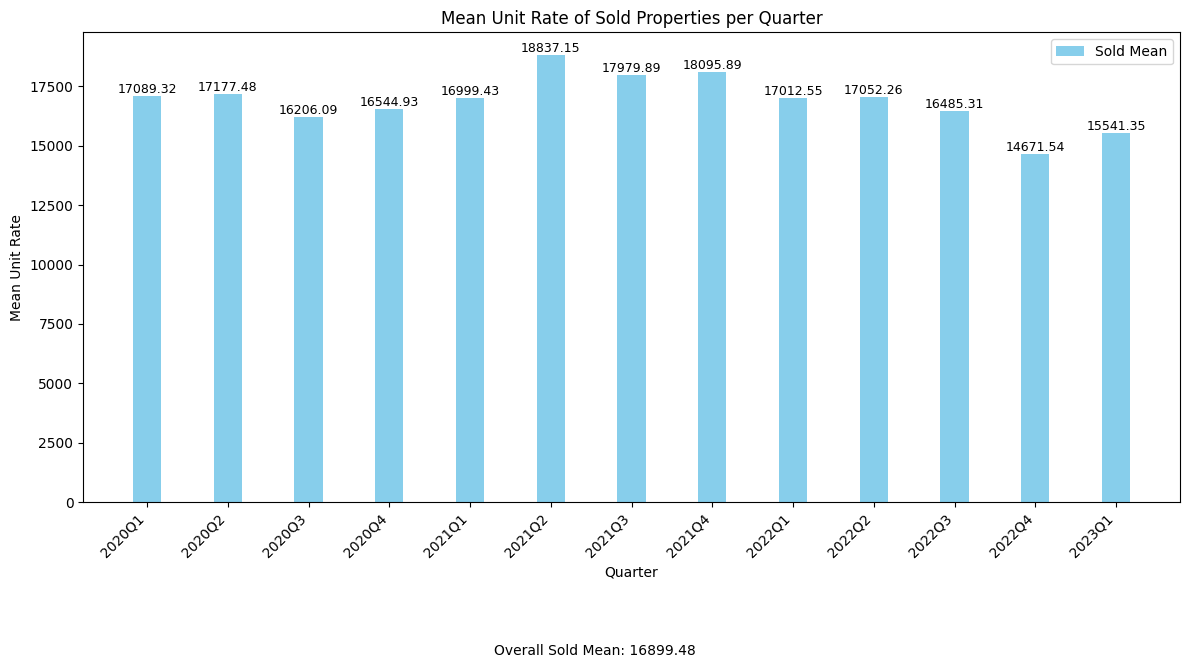

In [49]:
# Group by YearQuarter and calculate mean of unit rates
sold_mean = merged_dataset.groupby('YearQuarter')['unit_rate'].mean()

# Create a DataFrame for the mean unit rates
unit_rates_summary = pd.DataFrame({
    'Sold Mean': sold_mean
}).fillna(0)

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define the width of the bars
bar_width = 0.35

# Define the positions of the bars
index = np.arange(len(unit_rates_summary))

# Plot the bars
bar1 = ax.bar(index, unit_rates_summary['Sold Mean'], bar_width, label='Sold Mean', color='skyblue')

# Adding labels and title
ax.set_xlabel('Quarter')
ax.set_ylabel('Mean Unit Rate')
ax.set_title('Mean Unit Rate of Sold Properties per Quarter')

# Set the x-ticks and labels
ax.set_xticks(index)
ax.set_xticklabels(unit_rates_summary.index.astype(str), rotation=45, ha='right')

# Adding a legend
ax.legend()

# Display mean values as numbers on the bars
for i in range(len(index)):
    ax.text(index[i], unit_rates_summary['Sold Mean'][i] + 0.01,
            f'{unit_rates_summary["Sold Mean"][i]:.2f}',
            ha='center', va='bottom', fontsize=9)

# Calculate the overall mean
sold_overall_mean = sold_mean.mean()

# Display overall average below the graph
plt.figtext(0.5, -0.1, f"Overall Sold Mean: {sold_overall_mean:.2f}", ha='center', fontsize=10)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
merged_dataset.groupby(['YearQuarter', 'property_size']).size().unstack()
#.size().unstack(fill_value=0)

property_size,Large,Medium,Small,Very Large
YearQuarter,,,,
2020Q1,11,78,97,6
2020Q2,82,471,667,56
2020Q3,96,730,718,65
2020Q4,111,773,685,64
2021Q1,206,1093,1296,94
2021Q2,336,2540,2603,166
2021Q3,382,3196,4068,182
2021Q4,384,3280,5066,205
2022Q1,292,2834,3259,149


# Properties sold by size

<Figure size 2000x1000 with 0 Axes>

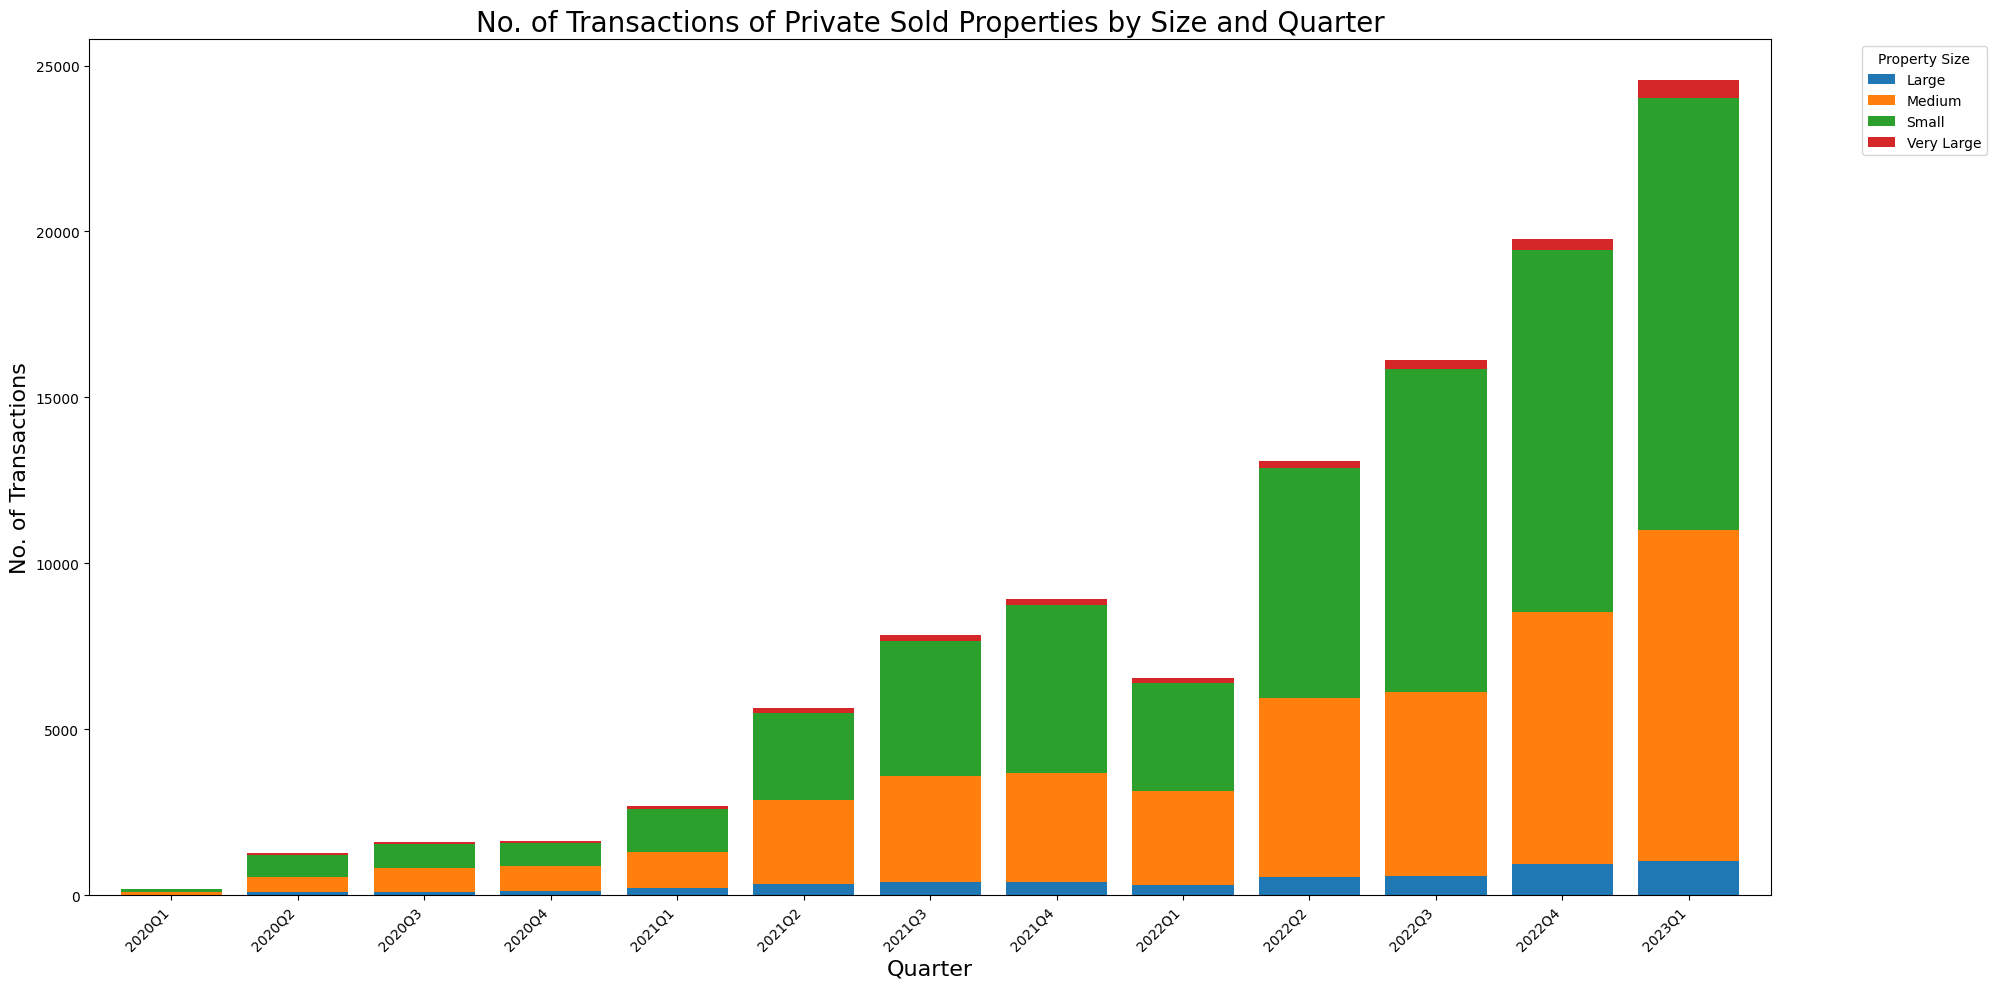

In [51]:
# Group by YearQuarter and property_size, then count transactions
transaction_counts = merged_dataset.groupby(['YearQuarter', 'property_size']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(20, 10))  # Increased figure width
ax = transaction_counts.plot(kind='bar', stacked=True, figsize=(20, 10), width=0.8)  # Increased bar width

# Customizing the plot
plt.title('No. of Transactions of Private Sold Properties by Size and Quarter', fontsize=20)
plt.xlabel('Quarter', fontsize=16)
plt.ylabel('No. of Transactions', fontsize=16)
plt.legend(title='Property Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()

# Show the plot
plt.show()

# Consider property size and unit rate for sold properties.

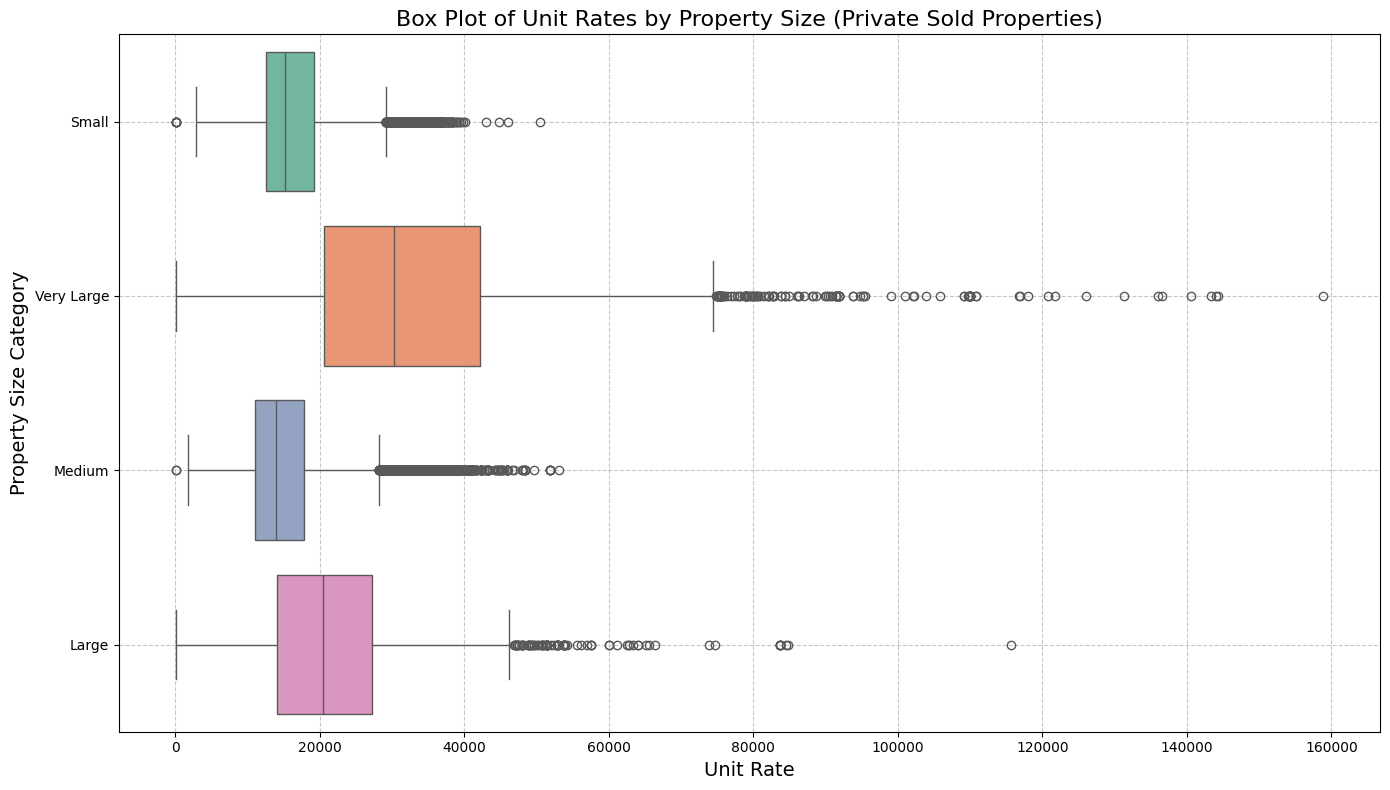

In [52]:
# Plotting the box plot with updated syntax for future compatibility
plt.figure(figsize=(14, 8))  # Increase figure size for better readability

# Replace 'private_sold' with 'merged_dataset'
sns.boxplot(x='unit_rate', y='property_size', data=merged_dataset, palette='Set2', hue=None, dodge=False)

# Customizing the plot
plt.title('Box Plot of Unit Rates by Property Size (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=14)
plt.ylabel('Property Size Category', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# Mean Unit rate price per square foot Movement of Sold Property Sizes by Quarter

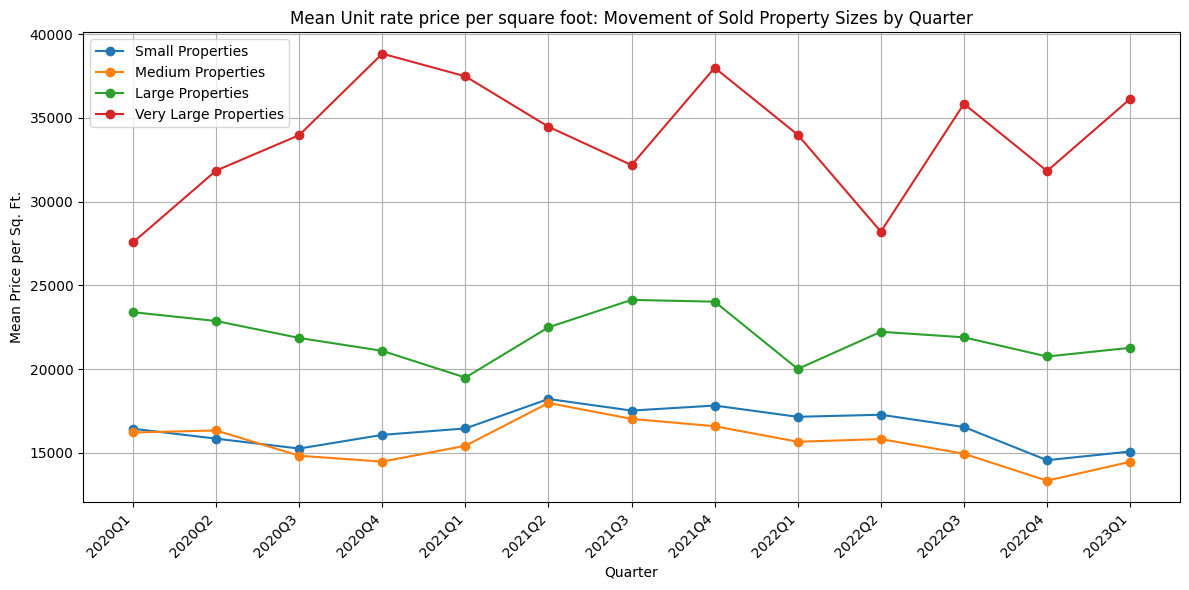

In [53]:
# Group by YearQuarter and property size, then calculate the mean unit rate
private_sold_rate_by_size = merged_dataset.groupby(['YearQuarter', 'property_size'])['unit_rate'].mean().unstack()

# Plotting
plt.figure(figsize=(12, 6))

# Plot the mean unit rate for each property size category
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Small'], label='Small Properties', marker='o')
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Medium'], label='Medium Properties', marker='o')
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Large'], label='Large Properties', marker='o')
plt.plot(private_sold_rate_by_size.index.astype(str), private_sold_rate_by_size['Very Large'], label='Very Large Properties', marker='o')

# Adding labels and title
plt.xlabel('Quarter')
plt.ylabel('Mean Price per Sq. Ft.')
plt.title('Mean Unit rate price per square foot: Movement of Sold Property Sizes by Quarter')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Distribution of Unit Rates by District

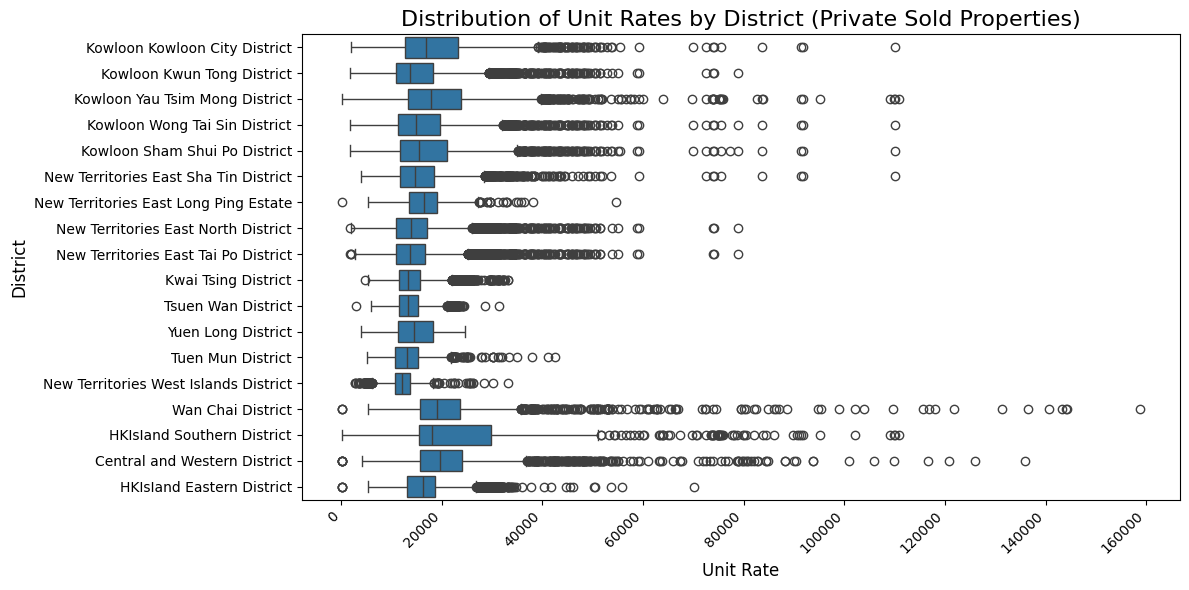

In [54]:
# Plotting box plot for merged_dataset (replace private_sold with merged_dataset)
plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_rate', y='district', data=merged_dataset)

# Customize the plot
plt.title('Distribution of Unit Rates by District (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=12)
plt.ylabel('District', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Distribution of Unit Rates by Region

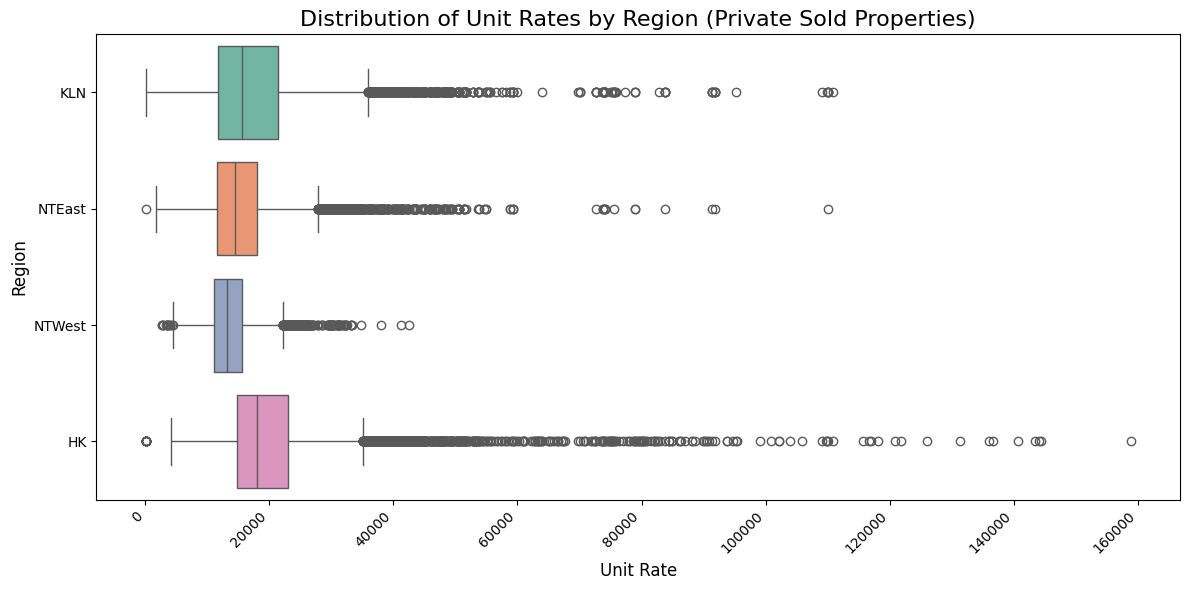

In [55]:

# Plotting box plot for private sold properties by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='unit_rate', y='region', data=merged_dataset, palette='Set2')

# Customize the plot
plt.title('Distribution of Unit Rates by Region (Private Sold Properties)', fontsize=16)
plt.xlabel('Unit Rate', fontsize=12)
plt.ylabel('Region', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Looking at the number of transactions in the districts for each yearly quarter

In [56]:
 merged_dataset.groupby(['YearQuarter', 'district']).size().unstack(fill_value=0)

district,Central and Western District,HKIsIand Eastern District,HKIsIand Southern District,Kowloon Kowloon City District,Kowloon Kwun Tong District,Kowloon Sham Shui Po District,Kowloon Wong Tai Sin District,Kowloon Yau Tsim Mong District,Kwai Tsing District,New Territories East Long Ping Estate,New Territories East North District,New Territories East Sha Tin District,New Territories East Tai Po District,New Territories West Islands District,Tsuen Wan District,Tuen Mun District,Wan Chai District,Yuen Long District
YearQuarter,,,,,,,,,,,,,,,,,,
2020Q1,0,0,64,0,0,0,0,0,50,0,0,0,0,0,0,0,78,0
2020Q2,0,0,407,0,0,0,0,0,418,0,0,0,0,0,0,0,451,0
2020Q3,0,0,391,0,0,0,0,0,429,0,0,0,0,371,0,0,418,0
2020Q4,0,0,337,0,0,0,0,0,401,0,0,0,0,431,0,0,464,0
2021Q1,709,0,418,0,0,0,0,0,492,0,0,0,0,519,104,0,447,0
2021Q2,1121,292,1208,0,0,0,0,0,604,0,0,0,0,534,1278,0,608,0
2021Q3,1031,1209,751,0,0,0,0,766,794,0,0,0,0,437,968,1339,533,0
2021Q4,846,862,528,0,0,0,0,1341,403,1032,0,0,0,279,678,871,364,1731
2022Q1,583,599,347,0,0,0,0,944,293,794,0,0,0,223,535,683,374,1159


<Figure size 1200x600 with 0 Axes>

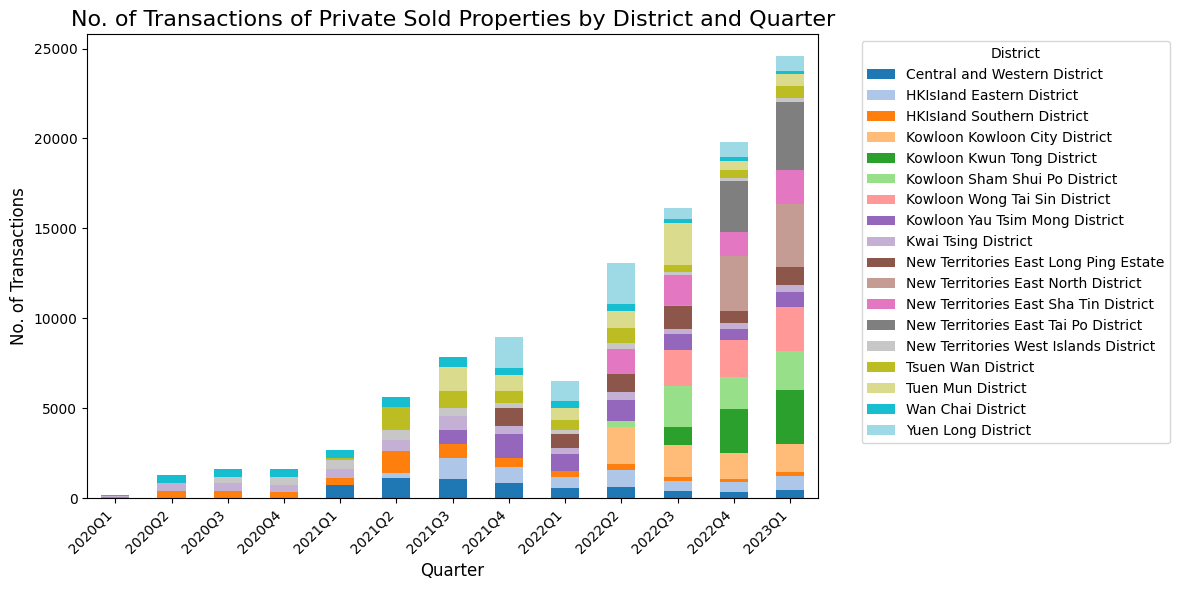

In [57]:
# Group by YearQuarter and district, then count transactions
tcount_sold_by_district = merged_dataset.groupby(['YearQuarter', 'district']).size().unstack(fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(12, 6))
tcount_sold_by_district.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Customizing the plot
plt.title('No. of Transactions of Private Sold Properties by District and Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('No. of Transactions', fontsize=12)
plt.legend(title='District', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()

# Looking at missing data in district

In [58]:
merged_dataset.groupby(['district', 'YearQuarter']).agg(
    Sales_Count=('new_price', 'count'),  # Count of sales
    Total_Price=('new_price', 'sum')     # Sum of prices
)

Sales_Count  Total_Price
district                     YearQuarter                          
Central and Western District 2021Q1               709  10472286482
                             2021Q2              1121  17764144784
                             2021Q3              1031  14750050402
                             2021Q4               846  13182713239
                             2022Q1               583   8572720216
...                                               ...          ...
Yuen Long District           2022Q1              1159   9944732090
                             2022Q2              2289  19365432889
                             2022Q3               594   4140462475
                             2022Q4               836   5540277020
                             2023Q1               799   5145438939

[125 rows x 2 columns]

In [59]:
# Look at the sales in each quarter to see what is missing

# Group by district and YearQuarter, calculating number of sales and average price
summary = merged_dataset.groupby(['district', 'YearQuarter']).agg(
    Sales_Count=('new_price', 'count'),  # Count of sales
    Total_Price=('new_price', 'sum')     # Sum of prices
).reset_index()

# Calculate Average Price per YearQuarter
summary['Average_Price'] = summary['Total_Price'] / summary['Sales_Count']

# Convert Average_Price to HK$ million
summary['Average_Price'] = summary['Average_Price'] / 1000000

# Create a complete list of all districts and YearQuarters
all_districts = summary['district'].unique()
all_yearquarters = summary['YearQuarter'].unique()

# Create a full grid of all combinations
full_index = pd.MultiIndex.from_product([all_districts, all_yearquarters], names=['district', 'YearQuarter'])
full_summary = pd.DataFrame(index=full_index).reset_index()

# Merge with the summary to fill in "no data" where applicable
final_table = pd.merge(full_summary, summary, on=['district', 'YearQuarter'], how='left')

# Fill NaN values with "no data"
final_table['Sales_Count'].fillna("no data", inplace=True)
final_table['Average_Price'].fillna("no data", inplace=True)
final_table['Total_Price'].fillna("no data", inplace=True)
# Sort by YearQuarter and district
final_table.sort_values(by=['YearQuarter', 'district'], inplace=True)

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display the full summary table
#print(final_table[['district', 'YearQuarter', 'Average_Price', 'Sales_Count']])
final_table.head(20)

,district,YearQuarter,Sales_Count,Total_Price,Average_Price
9,Central and Western District,2020Q1,no data,no data,no data
22,HKIsIand Eastern District,2020Q1,no data,no data,no data
35,HKIsIand Southern District,2020Q1,64.0,925014605.0,14.453353
48,Kowloon Kowloon City District,2020Q1,no data,no data,no data
61,Kowloon Kwun Tong District,2020Q1,no data,no data,no data
74,Kowloon Sham Shui Po District,2020Q1,no data,no data,no data
87,Kowloon Wong Tai Sin District,2020Q1,no data,no data,no data
100,Kowloon Yau Tsim Mong District,2020Q1,no data,no data,no data
113,Kwai Tsing District,2020Q1,50.0,289081798.0,5.781636
126,New Territories East Long Ping Estate,2020Q1,no data,no data,no data


In [60]:
# Using a heatmanp to display the missing data

# First, replace "no data" with NaN for easier manipulation
final_table['Sales_Count'] = final_table['Sales_Count'].replace("no data", pd.NA)

# Create a matrix to show where data is missing
missing_data_matrix = final_table.pivot(index='district', columns='YearQuarter', values='Sales_Count')

# Convert the missing data to a binary format: 1 for data present, 0 for missing
missing_data_matrix = missing_data_matrix.notna().astype(int)  # 1 for data present, 0 for data missing
missing_data_matrix.head(20)


YearQuarter,2020Q1,2020Q2,2020Q3,2020Q4,2021Q1,2021Q2,2021Q3,2021Q4,2022Q1,2022Q2,2022Q3,2022Q4,2023Q1
district,,,,,,,,,,,,,
Central and Western District,0,0,0,0,1,1,1,1,1,1,1,1,1
HKIsIand Eastern District,0,0,0,0,0,1,1,1,1,1,1,1,1
HKIsIand Southern District,1,1,1,1,1,1,1,1,1,1,1,1,1
Kowloon Kowloon City District,0,0,0,0,0,0,0,0,0,1,1,1,1
Kowloon Kwun Tong District,0,0,0,0,0,0,0,0,0,0,1,1,1
Kowloon Sham Shui Po District,0,0,0,0,0,0,0,0,0,1,1,1,1
Kowloon Wong Tai Sin District,0,0,0,0,0,0,0,0,0,0,1,1,1
Kowloon Yau Tsim Mong District,0,0,0,0,0,0,1,1,1,1,1,1,1
Kwai Tsing District,1,1,1,1,1,1,1,1,1,1,1,1,1


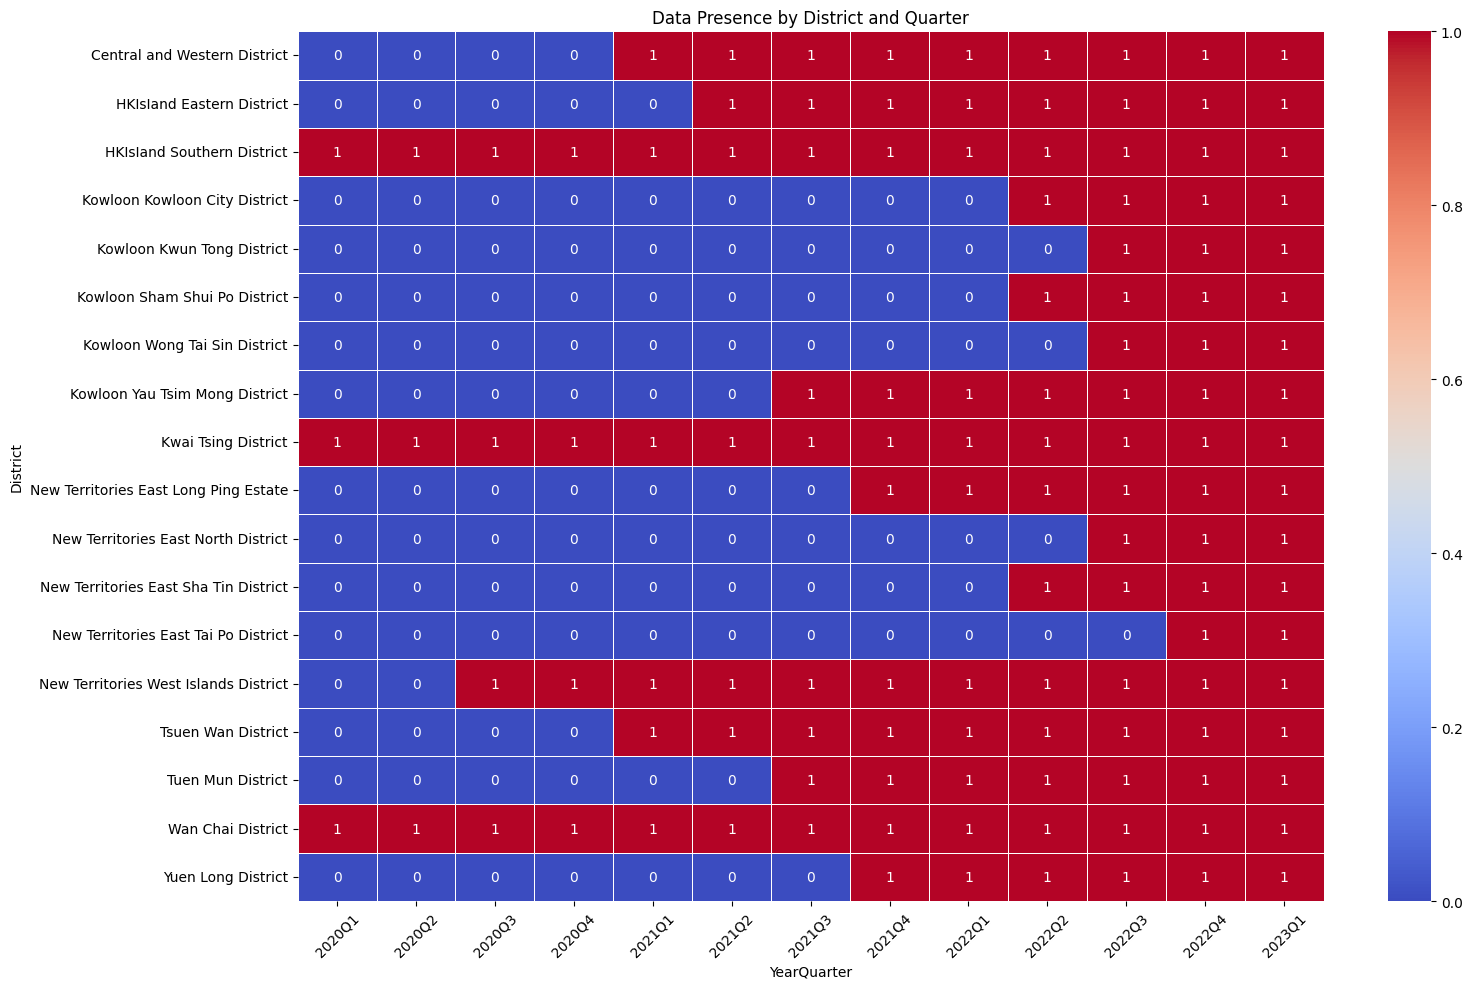

In [61]:
# Plot the heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(missing_data_matrix, annot=True, fmt="d", cmap="coolwarm", linewidths=.5)
plt.title('Data Presence by District and Quarter')
plt.xlabel('YearQuarter')
plt.ylabel('District')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Looking at the average price for each district from 2020-2023

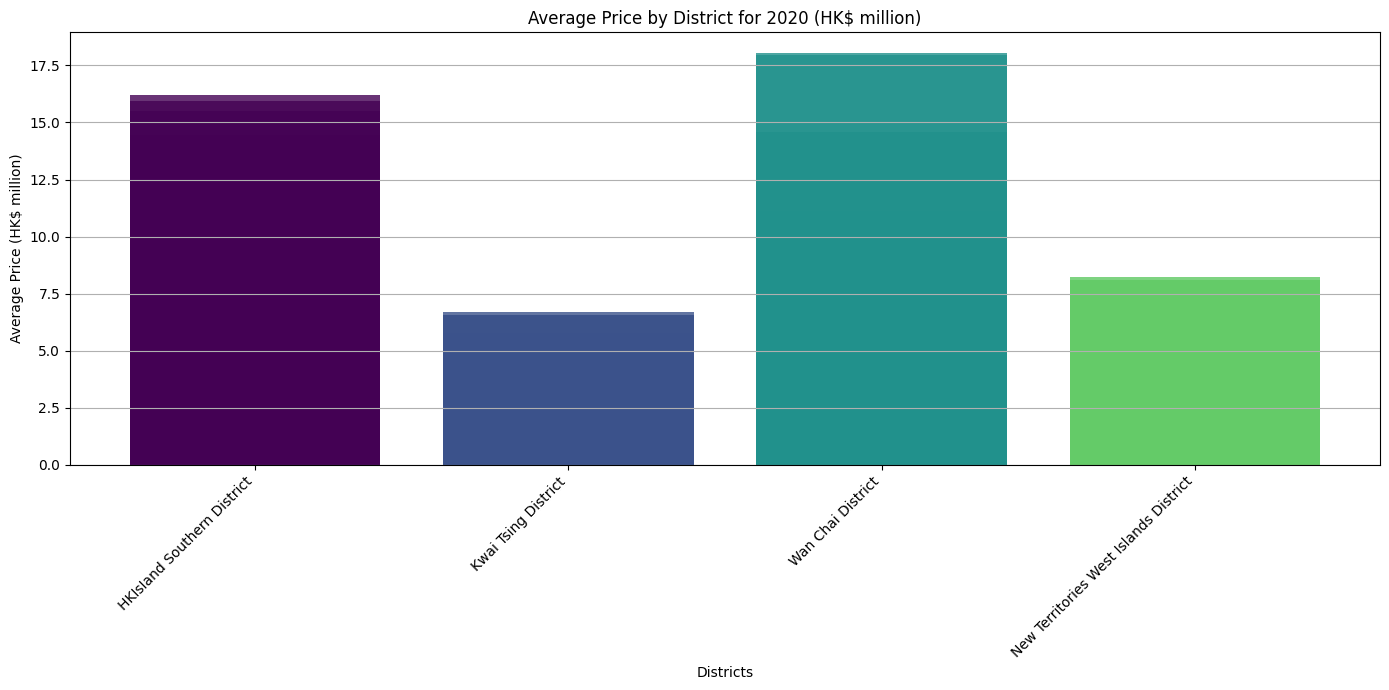

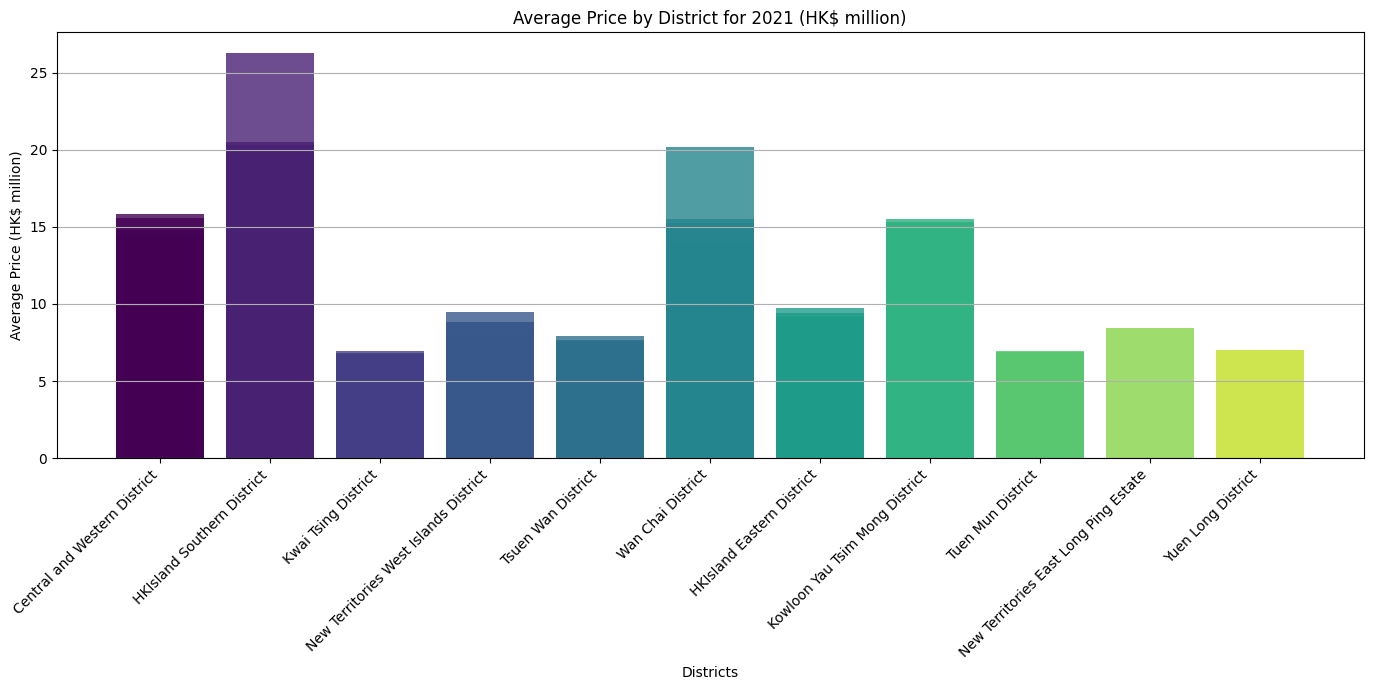

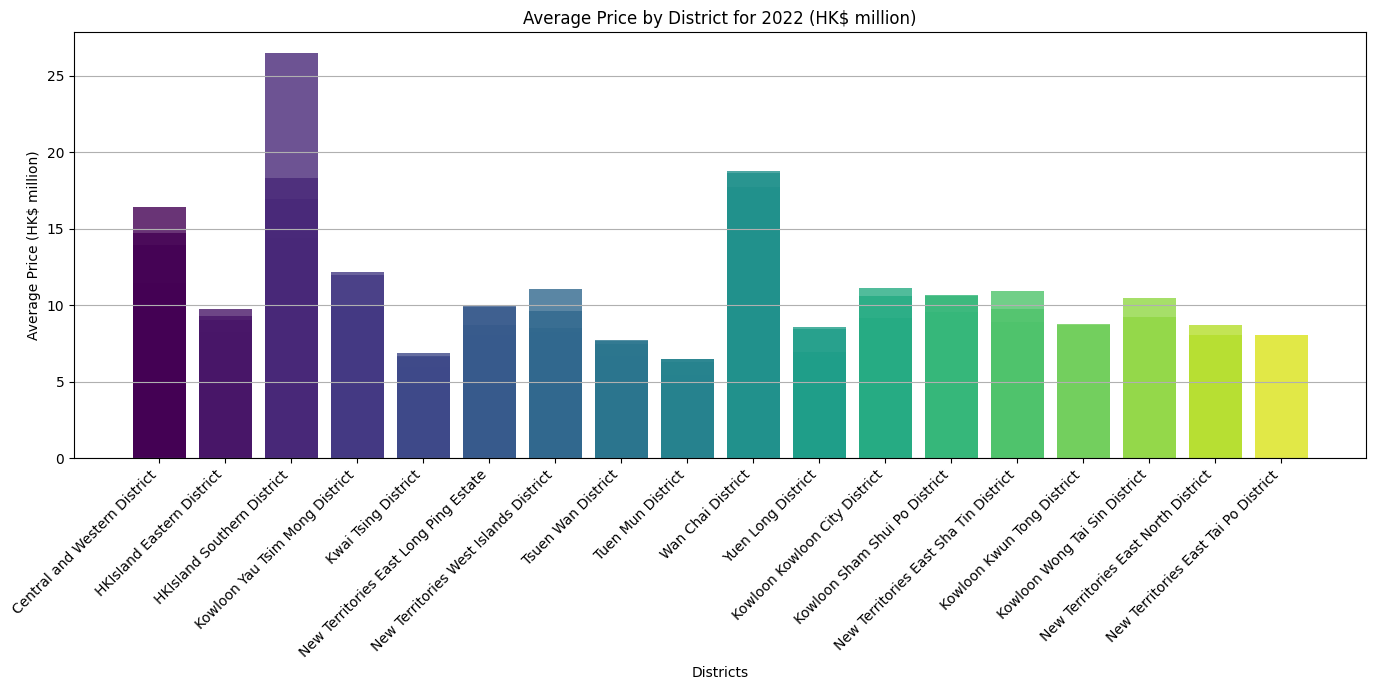

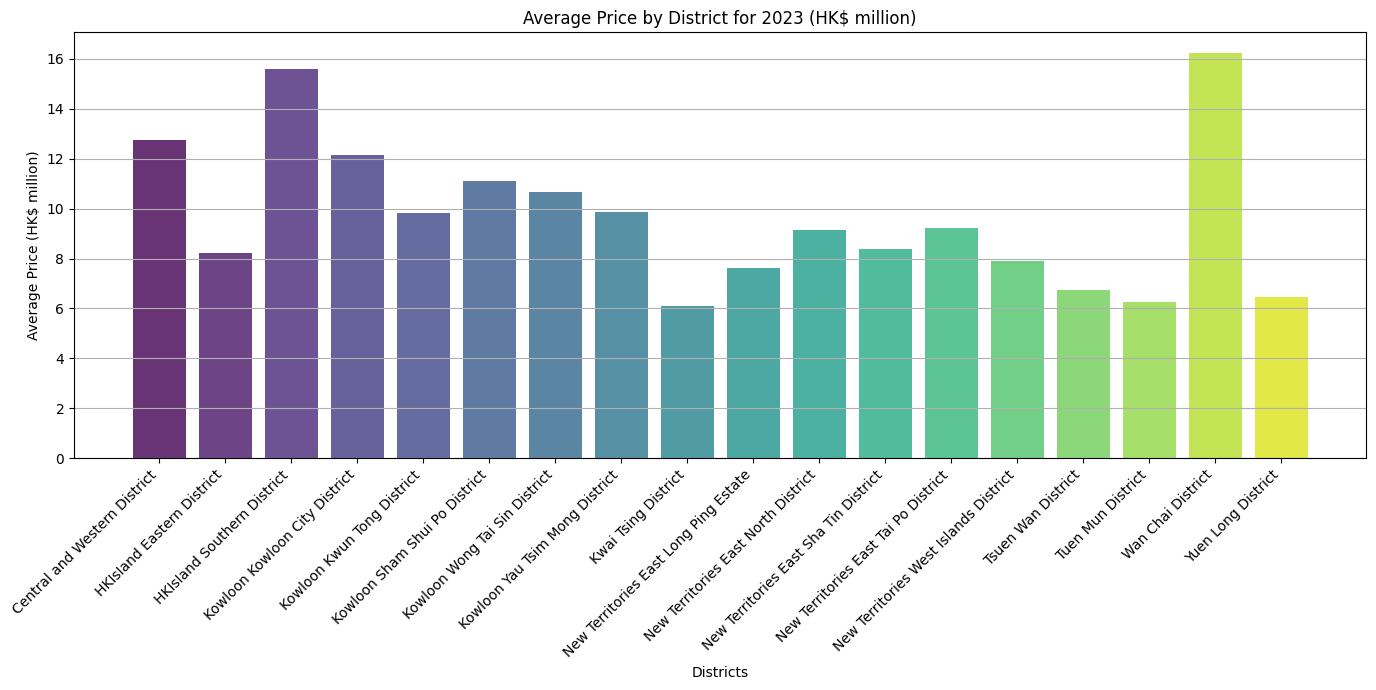

In [62]:
# Filter out rows where Average Price is "no data"
plot_data = final_table[final_table['Average_Price'] != "no data"].copy()

# Convert Average_Price to float for plotting
plot_data['Average_Price'] = plot_data['Average_Price'].astype(float)

# Extract Year from YearQuarter as string for plotting
plot_data['Year'] = plot_data['YearQuarter'].astype(str).str[:4]  # Get the first 4 characters for the year

# Create a plot for each year
years = plot_data['Year'].unique()

# Use a colormap for unique colors
color_map = plt.cm.viridis

for year in years:
    plt.figure(figsize=(14, 7))

    # Filter data for the current year
    year_data = plot_data[plot_data['Year'] == year]

    # Assign unique colors to each district
    colors = [color_map(i / len(year_data['district'].unique())) for i in range(len(year_data['district'].unique()))]
    district_color_map = {district: colors[i] for i, district in enumerate(year_data['district'].unique())}

    # Plotting with unique colors
    plt.bar(year_data['district'], year_data['Average_Price'],
            color=[district_color_map[district] for district in year_data['district']], alpha=0.8)

    # Adding labels and title
    plt.title(f'Average Price by District for {year} (HK$ million)')
    plt.xlabel('Districts')
    plt.ylabel('Average Price (HK$ million)')
    plt.xticks(rotation=45, ha='right')  # Rotate labels and align them to the right
    plt.grid(axis='y')

    # Show the plot for the current year
    plt.tight_layout()
    plt.show()

# Optionally, display the summary table
#print(plot_data[['district', 'YearQuarter', 'Average_Price', 'Sales_Count']])

In [63]:
# Look at the types of districts in the database
merged_dataset['district'].unique()

array(['Kowloon Kowloon City District', 'Kowloon Kwun Tong District',
       'Kowloon Yau Tsim Mong District', 'Kowloon Wong Tai Sin District',
       'Kowloon Sham Shui Po District',
       'New Territories East Sha Tin District',
       'New Territories East Long Ping Estate',
       'New Territories East North District',
       'New Territories East Tai Po District', 'Kwai Tsing District',
       'Tsuen Wan District', 'Yuen Long District', 'Tuen Mun District',
       'New Territories West Islands District', 'Wan Chai District',
       'HKIsIand Southern District', 'Central and Western District',
       'HKIsIand Eastern District'], dtype=object)

In [64]:
# District (location) will be important in determining property prices
# One Hot encode the districts so they can be used for further analysis
one_hot_encoded = pd.get_dummies(merged_dataset['district'], prefix='district')
unique_districts = merged_dataset['district'].unique()
label_mapping = {district: i+1 for i, district in enumerate(unique_districts)}
merged_dataset['district_encoded'] = merged_dataset['district'].map(label_mapping)

In [65]:
merged_dataset['district_encoded'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18])

In [66]:
#sanity check
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109888 entries, 7 to 159675
Data columns (total 28 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   date                   109888 non-null  object 
 1   saleable_area(ft^2)    109888 non-null  int64  
 2   unit_rate              109888 non-null  int64  
 3   district               109888 non-null  object 
 4   floor                  109888 non-null  float64
 5   YearQuarter            109888 non-null  object 
 6   timestamp              109888 non-null  object 
 7   unix_timestamp         109888 non-null  int64  
 8   scaled_unix_timestamp  109888 non-null  float64
 9   CG                     109888 non-null  float64
 10  CI                     109888 non-null  float64
 11  CPI                    109888 non-null  float64
 12  GDP                    109888 non-null  float64
 13  HS                     109888 non-null  float64
 14  IR                     109888 non-null  f

# DISTRIBUTION OF DATA

In [67]:
# Display the first 20 rows of the merged_dataset
print(merged_dataset.head(20))

        date  saleable_area(ft^2)  unit_rate                       district  \
7   08-03-23                  423      15792  Kowloon Kowloon City District   
13  08-03-23                 2190      34703  Kowloon Kowloon City District   
14  08-03-23                  761      15857  Kowloon Kowloon City District   
15  08-03-23                  320      13717  Kowloon Kowloon City District   
16  08-03-23                  519      16541  Kowloon Kowloon City District   
17  08-03-23                  699      14721  Kowloon Kowloon City District   
18  08-03-23                  463      15907  Kowloon Kowloon City District   
19  08-03-23                  593      18799  Kowloon Kowloon City District   
20  08-03-23                  501      15111  Kowloon Kowloon City District   
21  08-03-23                  439      13662  Kowloon Kowloon City District   
22  08-03-23                  289      14194  Kowloon Kowloon City District   
23  08-03-23                  617      25863  Kowloo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_dataset is already loaded
# Display the first 20 values of the 'new_price' column
new_price_values = merged_dataset['new_price'].head(20)
print("First 20 values of 'new_price':\n", new_price_values)

# Check the type and summary statistics of 'new_price'
print("\nData type of 'new_price':", merged_dataset['new_price'].dtype)
print("\nSummary statistics of 'new_price':\n", merged_dataset['new_price'].describe())

# Check for very large values or outliers
outliers = merged_dataset[merged_dataset['new_price'] > 1.75]
print("\nOutliers in 'new_price':\n", outliers)

# Consider removing outliers for better visualization
filtered_data = merged_dataset[merged_dataset['new_price'] <= 1.75]

# Plotting the distribution curve for 'new_price'
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['new_price'], bins=30, kde=True, color='blue', stat='density', alpha=0.5)
plt.title('Distribution of New Price with KDE')
plt.xlabel('New Price')
plt.ylabel('Density')
plt.xlim(left=filtered_data['new_price'].min(), right=filtered_data['new_price'].max())  # Set x-axis limits
plt.grid(True)
plt.tight_layout()
plt.show()

First 20 values of 'new_price':
 7      6680016
13    75999570
14    12067177
15     4389440
16     8584779
17    10289979
18     7364941
19    11147807
20     7570611
21     5997618
22     4102066
23    15957471
24     6490380
25    22796205
26    21677700
27     7298896
28     4338390
29     7790796
30     8994564
31     8059488
Name: new_price, dtype: int64

Calculated bins for 'new_price':
 [-45368870.10434771 -41541403.27501957 -37713936.44569142
 -33886469.61636328 -30059002.78703514 -26231535.95770699
 -22404069.12837885 -18576602.2990507  -14749135.46972256
 -10921668.64039441  -7094201.81106627  -3266734.98173813
    560731.84759002   4388198.67691816   8215665.50624631
  12043132.33557446  15870599.1649026   19698065.99423074
  23525532.82355889  27352999.65288702  31180466.48221517
  35007933.31154332  38835400.14087146  42662866.97019961
  46490333.79952776  50317800.62885589  54145267.45818404
  57972734.28751219  61800201.11684033  65627667.94616847]

Calculated bins for 

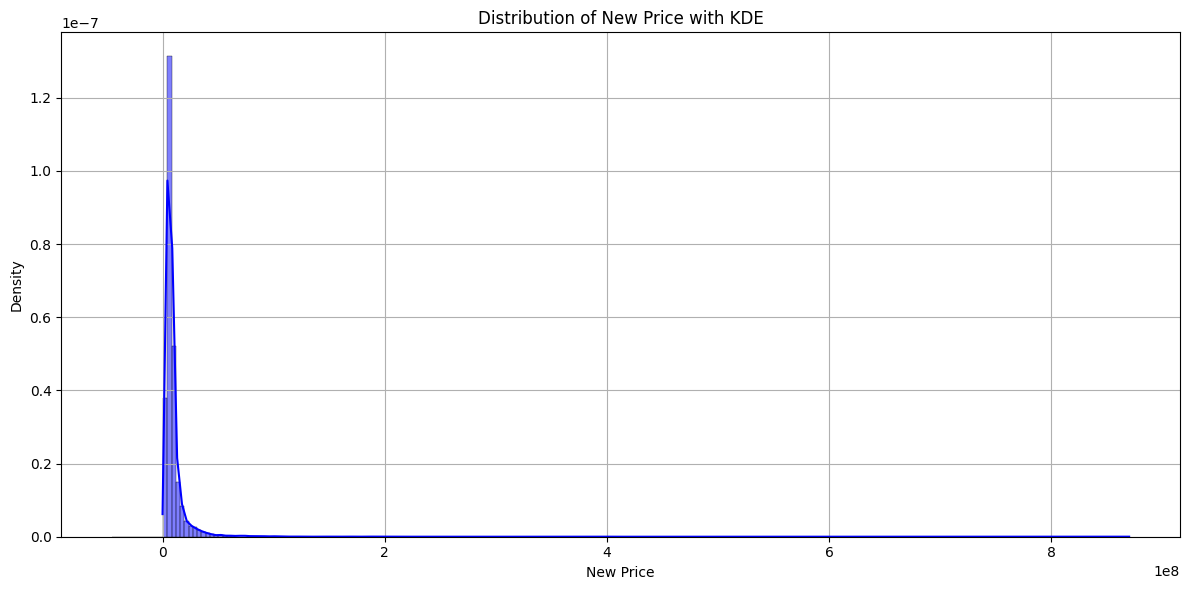

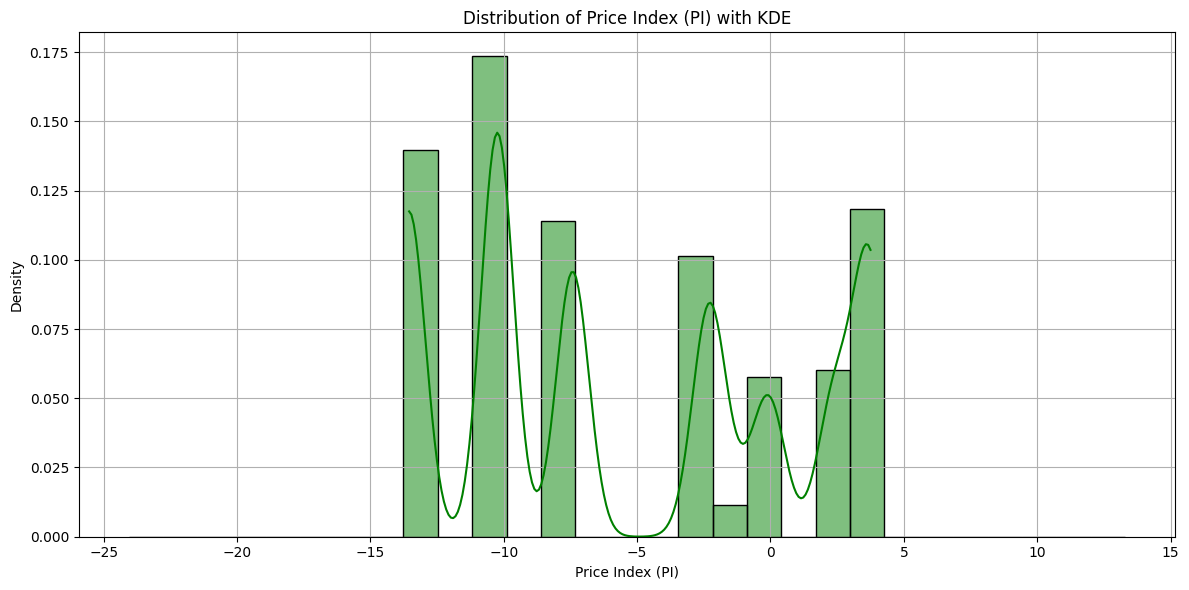

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_dataset is already loaded
# Display the first 20 values of the 'new_price' column
new_price_values = merged_dataset['new_price'].head(20)
print("First 20 values of 'new_price':\n", new_price_values)

# Calculate the mean and standard deviation for 'new_price'
mean_price = merged_dataset['new_price'].mean()
std_price = merged_dataset['new_price'].std()

# Create bins for 'new_price' for bell curve
bins_price = np.linspace(mean_price - 3*std_price, mean_price + 3*std_price, 30)  # 30 bins
print("\nCalculated bins for 'new_price':\n", bins_price)

# Calculate the mean and standard deviation for 'PI'
mean_pi = merged_dataset['PI'].mean()
std_pi = merged_dataset['PI'].std()

# Create bins for 'PI' for bell curve
bins_pi = np.linspace(mean_pi - 3*std_pi, mean_pi + 3*std_pi, 30)  # 30 bins
print("\nCalculated bins for 'PI':\n", bins_pi)

# Plotting the distribution curve for 'new_price'
plt.figure(figsize=(12, 6))
sns.histplot(merged_dataset['new_price'], bins=bins_price, kde=True, color='blue', stat='density', alpha=0.5)
plt.title('Distribution of New Price with KDE')
plt.xlabel('New Price')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the distribution curve for 'PI'
plt.figure(figsize=(12, 6))
sns.histplot(merged_dataset['PI'], bins=bins_pi, kde=True, color='green', stat='density', alpha=0.5)
plt.title('Distribution of Price Index (PI) with KDE')
plt.xlabel('Price Index (PI)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

First 20 values of 'new_price':
 7      6680016
13    75999570
14    12067177
15     4389440
16     8584779
17    10289979
18     7364941
19    11147807
20     7570611
21     5997618
22     4102066
23    15957471
24     6490380
25    22796205
26    21677700
27     7298896
28     4338390
29     7790796
30     8994564
31     8059488
Name: new_price, dtype: int64

Data type of 'new_price': int64

Summary statistics of 'new_price':
 count    1.098880e+05
mean     1.012940e+07
std      1.849942e+07
min      3.026800e+04
25%      5.100189e+06
50%      6.800285e+06
75%      9.799940e+06
max      8.702409e+08
Name: new_price, dtype: float64

Outliers removed: 10339
New dataset size: 99549


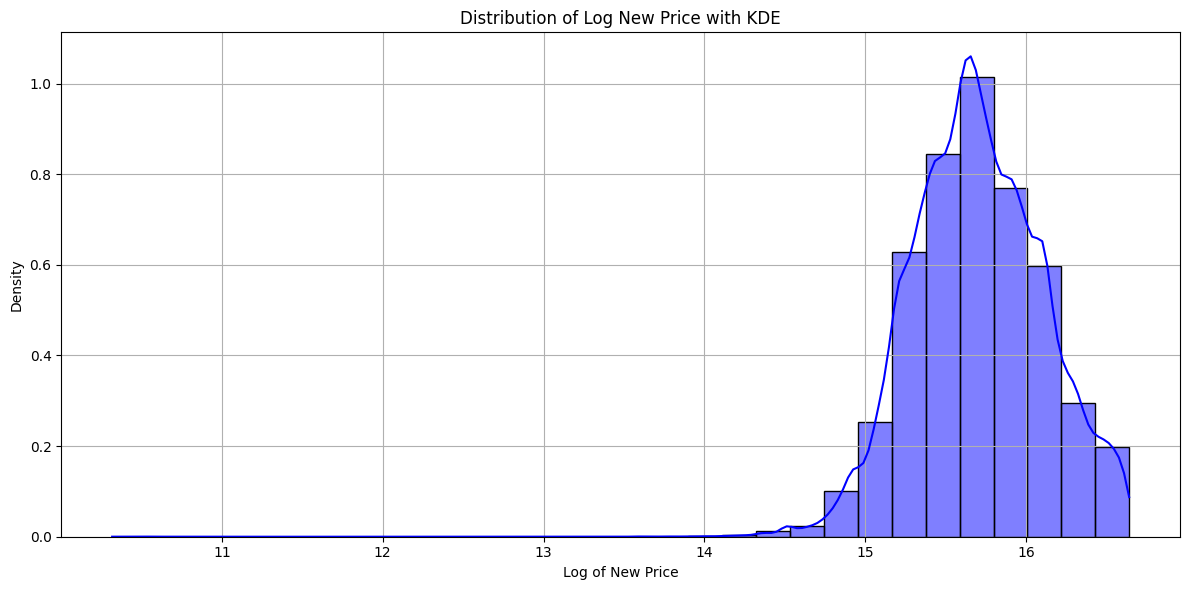

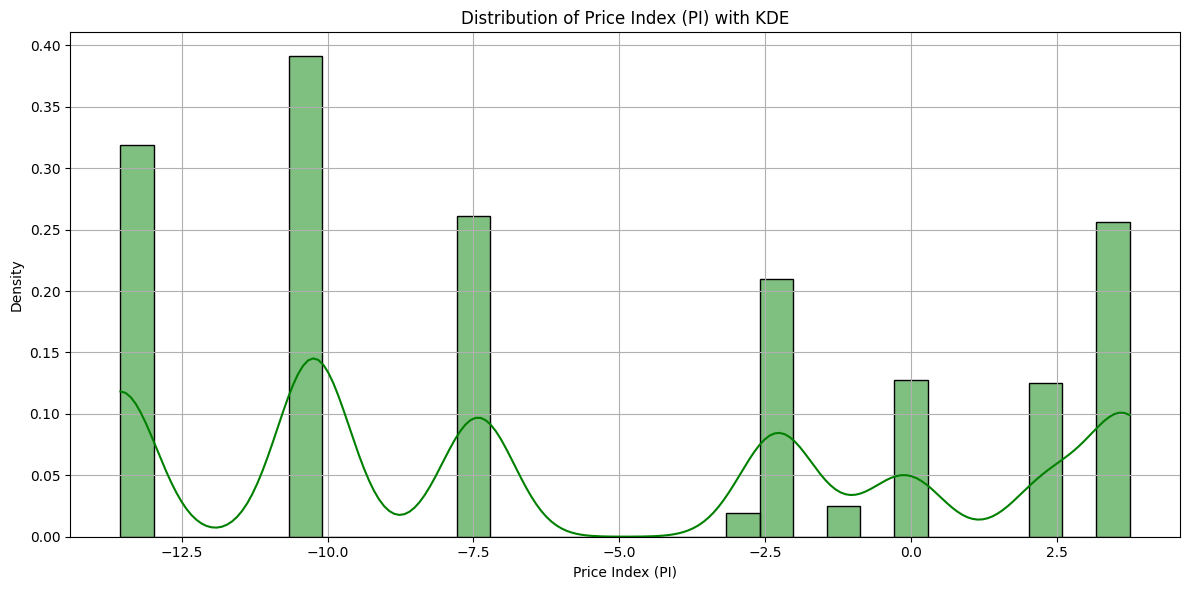

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_dataset is already loaded
# Display the first 20 values of the 'new_price' column
new_price_values = merged_dataset['new_price'].head(20)
print("First 20 values of 'new_price':\n", new_price_values)

# Check the type and summary statistics of 'new_price'
print("\nData type of 'new_price':", merged_dataset['new_price'].dtype)
print("\nSummary statistics of 'new_price':\n", merged_dataset['new_price'].describe())

# Identify outliers using IQR
Q1 = merged_dataset['new_price'].quantile(0.25)
Q3 = merged_dataset['new_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_data = merged_dataset[(merged_dataset['new_price'] >= lower_bound) & (merged_dataset['new_price'] <= upper_bound)]

print(f"\nOutliers removed: {len(merged_dataset) - len(filtered_data)}")
print(f"New dataset size: {len(filtered_data)}")

# Log transformation if necessary
filtered_data['log_new_price'] = np.log1p(filtered_data['new_price'])

# Plotting the distribution curve for 'new_price'
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['log_new_price'], bins=30, kde=True, color='blue', stat='density', alpha=0.5)
plt.title('Distribution of Log New Price with KDE')
plt.xlabel('Log of New Price')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the distribution curve for 'PI'
plt.figure(figsize=(12, 6))
sns.histplot(filtered_data['PI'], bins=30, kde=True, color='green', stat='density', alpha=0.5)
plt.title('Distribution of Price Index (PI) with KDE')
plt.xlabel('Price Index (PI)')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()

# Getting ready for ML

In [71]:
# Consider dropping remaining object columns before analysis

# Check columns names
# Get column names as a list
column_names = merged_dataset.columns.tolist()
print(column_names)

['date', 'saleable_area(ft^2)', 'unit_rate', 'district', 'floor', 'YearQuarter', 'timestamp', 'unix_timestamp', 'scaled_unix_timestamp', 'CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'LTV', 'M3', 'MW', 'PG', 'PI', 'SD', 'SM', 'SOLD', 'UR', 'property_size', 'region', 'new_price', 'district_encoded']


In [72]:
# Function to detect outliers using IQR
def detect_outliers_iqr(merged_dataset):
    outliers = pd.DataFrame()
    for col in merged_dataset.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = merged_dataset[col].quantile(0.25)
        Q3 = merged_dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = ((merged_dataset[col] < lower_bound) | (merged_dataset[col] > upper_bound))
    return outliers

# Function to handle outliers by replacing them with the median value
def handle_outliers(merged_dataset):
    outliers = detect_outliers_iqr(merged_dataset)
    summary = {"column": [], "outliers_detected": [], "action_taken": []}

    for col in outliers.columns:
        # Count the number of outliers in the column
        num_outliers = outliers[col].sum()

        if num_outliers > 0:
            # Replace outliers with the median value
            median_value = merged_dataset[col].median()
            merged_dataset.loc[outliers[col], col] = median_value

            # Add summary information
            summary["column"].append(col)
            summary["outliers_detected"].append(num_outliers)
            summary["action_taken"].append(f"{num_outliers} outliers replaced with median value {median_value}")
        else:
            # No outliers detected in this column
            summary["column"].append(col)
            summary["outliers_detected"].append(0)
            summary["action_taken"].append("No action taken (no outliers detected)")

    # Convert the summary to a dataframe for better readability
    summary_df = pd.DataFrame(summary)

    return merged_dataset, summary_df

# Detecting outliers
outliers = detect_outliers_iqr(merged_dataset)

# Count the total number of outliers detected
total_outliers = outliers.sum().sum()
print(f"Total outliers detected across all columns: {total_outliers}")

# Handling outliers and getting summary
cleaned_dataset, outliers_summary = handle_outliers(merged_dataset)

# Print the summary of outliers handled
print("\nSummary of Outliers Detected and Handled:")
print(outliers_summary)

Total outliers detected across all columns: 71510

Summary of Outliers Detected and Handled:
                   column  outliers_detected  \
0     saleable_area(ft^2)               6781   
1               unit_rate               4733   
2                   floor               3349   
3          unix_timestamp                816   
4   scaled_unix_timestamp                816   
5                      CG                192   
6                      CI                  0   
7                     CPI                  0   
8                     GDP               4710   
9                      HS                  0   
10                     IR                  0   
11                    LTV                  0   
12                     M3               3101   
13                     MW                  0   
14                     PG                  0   
15                     PI                  0   
16                     SD                  0   
17                     SM                  

# Normalise the variables for further ML analysis

In [73]:
# # Need to normalise the macro values
# from sklearn.preprocessing import MinMaxScaler

# # List of columns to normalize
# columns_to_normalize = ['saleable_area(ft^2)','unit_rate', 'new_price','CG', 'CI', 'CPI', 'GDP', 'HS', 'IR', 'M3', 'MW', 'PG', 'SD', 'SM','UR', 'floor']

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

# # Apply the scaler to the specified columns
# merged_dataset[columns_to_normalize] = scaler.fit_transform(merged_dataset[columns_to_normalize])


# Define the targets and the features

In [74]:
merged_dataset.isnull().sum()

,0
date,0
saleable_area(ft^2),0
unit_rate,0
district,0
floor,0
YearQuarter,0
timestamp,0
unix_timestamp,0
scaled_unix_timestamp,0
CG,0


In [75]:
merged_dataset.shape

(109888, 28)

# Drop columns not useful for the LSDM modle from 'merged_dataset'

In [76]:
columns_to_drop = ['floor', 'price_range','property_size', 'region','YearQuarter', 'pi_range', 'YearQuarter_encoded', 'property_size_encoded', 'date', 'district', 'timestamp', 'unix_timestamp', 'district_encoded', 'YearQuarter_encoded', 'property_size_encoded', 'region_encoded']

# Drop the columns (only if they exist in the dataframe)
merged_dataset.drop(columns=[col for col in columns_to_drop if col in merged_dataset.columns], inplace=True)

# Check the shape of the dataframe after dropping the columns
print(f"Shape of the dataframe after dropping 'date' and 'district': {merged_dataset.shape}")

# Optionally, display the first few rows of the updated dataframe
merged_dataset.head()

Shape of the dataframe after dropping 'date' and 'district': (109888, 19)


,saleable_area(ft^2),unit_rate,scaled_unix_timestamp,CG,CI,CPI,GDP,HS,IR,LTV,M3,MW,PG,PI,SD,SM,SOLD,UR,new_price
7,423,15792,0.997263,9.1,66.1,2.0,91.4,5250.0,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,6680016
13,482,14993,0.997263,9.1,66.1,2.0,91.4,5250.0,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,6800285
14,761,15857,0.997263,9.1,66.1,2.0,91.4,5250.0,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,12067177
15,320,13717,0.997263,9.1,66.1,2.0,91.4,5250.0,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,4389440
16,519,16541,0.997263,9.1,66.1,2.0,91.4,5250.0,4.75,0.5,16.5,17.7,8.0,-10.24,0.08,20.58,14509.0,3.3,8584779


In [77]:
merged_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 109888 entries, 7 to 159675
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   saleable_area(ft^2)    109888 non-null  int64  
 1   unit_rate              109888 non-null  int64  
 2   scaled_unix_timestamp  109888 non-null  float64
 3   CG                     109888 non-null  float64
 4   CI                     109888 non-null  float64
 5   CPI                    109888 non-null  float64
 6   GDP                    109888 non-null  float64
 7   HS                     109888 non-null  float64
 8   IR                     109888 non-null  float64
 9   LTV                    109888 non-null  float64
 10  M3                     109888 non-null  float64
 11  MW                     109888 non-null  float64
 12  PG                     109888 non-null  float64
 13  PI                     109888 non-null  float64
 14  SD                     109888 non-null  f

# CHECK VARIABLE CORRELATION

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming merged_dataset is your DataFrame
# Define the feature matrix (X) and target variables (y)
features = merged_dataset.drop(columns=['new_price', 'PI'])
target_variables = ['new_price', 'PI']

# Select only the target variables for correlation
target_data = merged_dataset[target_variables]

# Calculate the correlation matrix
correlation_matrix = target_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Set titles and labels
plt.title('Correlation Heatmap for Targets: new_price and PI')
plt.show()

# DEFINE THE FEATURES AND VARIABLES
### Defining the feature matrix (X) and target variables (y) from the merged dataset.

In [78]:
# Scale the dataset before LSTM
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Scale the dataset
merged_dataset_scaled = scaler.fit_transform(merged_dataset.values)

# Convert the scaled data back to a DataFrame with the same column names
merged_dataset = pd.DataFrame(merged_dataset_scaled, columns=merged_dataset.columns)

# Print to verify
print("Scaled dataset:")
print(merged_dataset.head())

Scaled dataset:
   saleable_area(ft^2)  unit_rate  scaled_unix_timestamp   CG        CI  CPI  \
0             0.344456   0.496779               0.998037  1.0  0.952141  1.0   
1             0.407966   0.468496               0.998037  1.0  0.952141  1.0   
2             0.708288   0.499080               0.998037  1.0  0.952141  1.0   
3             0.233584   0.423327               0.998037  1.0  0.952141  1.0   
4             0.447793   0.523292               0.998037  1.0  0.952141  1.0   

        GDP   HS   IR  LTV   M3   MW        PG        PI   SD        SM  SOLD  \
0  0.634361  0.0  1.0  0.0  1.0  1.0  0.756098  0.191329  0.0  0.249339   0.0   
1  0.634361  0.0  1.0  0.0  1.0  1.0  0.756098  0.191329  0.0  0.249339   0.0   
2  0.634361  0.0  1.0  0.0  1.0  1.0  0.756098  0.191329  0.0  0.249339   0.0   
3  0.634361  0.0  1.0  0.0  1.0  1.0  0.756098  0.191329  0.0  0.249339   0.0   
4  0.634361  0.0  1.0  0.0  1.0  1.0  0.756098  0.191329  0.0  0.249339   0.0   

    UR  new_pric

In [79]:
# Define the feature matrix (X) and target variables (y)
#features = merged_dataset.drop(columns=['unit_rate', 'new_price', 'PI'])
#target_variables = ['unit_rate', 'new_price', 'PI']
features = merged_dataset.drop(columns=['new_price', 'PI'])
target_variables = ['new_price', 'PI']


In [80]:
target_variables

['new_price', 'PI']

In [81]:
merged_dataset['new_price'].head(20) #without scaling

,new_price
0,0.395365
1,0.402515
2,0.715661
3,0.259177
4,0.508613
5,0.609997
6,0.436087
7,0.661000
8,0.448315
9,0.354792


In [82]:
features.head()

,saleable_area(ft^2),unit_rate,scaled_unix_timestamp,CG,CI,CPI,GDP,HS,IR,LTV,M3,MW,PG,SD,SM,SOLD,UR
0,0.344456,0.496779,0.998037,1.0,0.952141,1.0,0.634361,0.0,1.0,0.0,1.0,1.0,0.756098,0.0,0.249339,0.0,0.0
1,0.407966,0.468496,0.998037,1.0,0.952141,1.0,0.634361,0.0,1.0,0.0,1.0,1.0,0.756098,0.0,0.249339,0.0,0.0
2,0.708288,0.499080,0.998037,1.0,0.952141,1.0,0.634361,0.0,1.0,0.0,1.0,1.0,0.756098,0.0,0.249339,0.0,0.0
3,0.233584,0.423327,0.998037,1.0,0.952141,1.0,0.634361,0.0,1.0,0.0,1.0,1.0,0.756098,0.0,0.249339,0.0,0.0
4,0.447793,0.523292,0.998037,1.0,0.952141,1.0,0.634361,0.0,1.0,0.0,1.0,1.0,0.756098,0.0,0.249339,0.0,0.0


In [83]:
features.shape

(109888, 17)

In [84]:
# Check for NaN values in the features and target
print("Checking for NaN in features:", features.isnull().sum())
print("Checking for NaN in targets:", merged_dataset[target_variables].isnull().sum())

# Fill or drop missing values
features = features.fillna(features.mean())  # Replace NaN in features with column means
for target in target_variables:
    merged_dataset[target] = merged_dataset[target].fillna(merged_dataset[target].mean())  # Replace NaN in target

Checking for NaN in features: saleable_area(ft^2)      0
unit_rate                0
scaled_unix_timestamp    0
CG                       0
CI                       0
CPI                      0
GDP                      0
HS                       0
IR                       0
LTV                      0
M3                       0
MW                       0
PG                       0
SD                       0
SM                       0
SOLD                     0
UR                       0
dtype: int64
Checking for NaN in targets: new_price    0
PI           0
dtype: int64


# BASE LSTM

Missing values: saleable_area(ft^2)      0
unit_rate                0
scaled_unix_timestamp    0
CG                       0
CI                       0
CPI                      0
GDP                      0
HS                       0
IR                       0
LTV                      0
M3                       0
MW                       0
PG                       0
PI                       0
SD                       0
SM                       0
SOLD                     0
UR                       0
new_price                0
dtype: int64

Training LSTM model for new_price...

Training model with 20 samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training model with 8811 samples...
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training model with 17602 samples...
551/551 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training model with 26393 samples...
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s

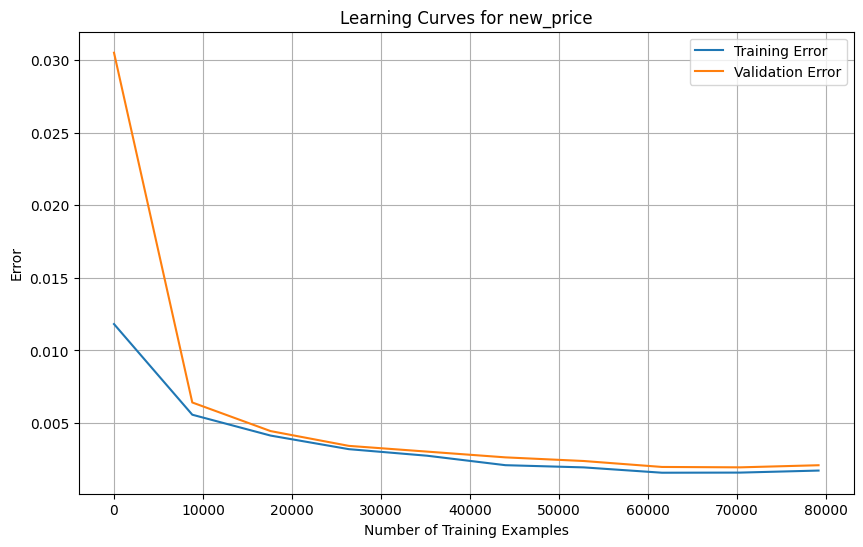

Finished training for new_price.

Training LSTM model for PI...

Training model with 20 samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 8811 samples...
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 17602 samples...
551/551 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training model with 26393 samples...
825/825 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 35184 samples...
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training model with 43975 samples...
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 52766 samples...
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training model with 61557 samples...
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
687/687 ━━━━━━━━━━━━━━

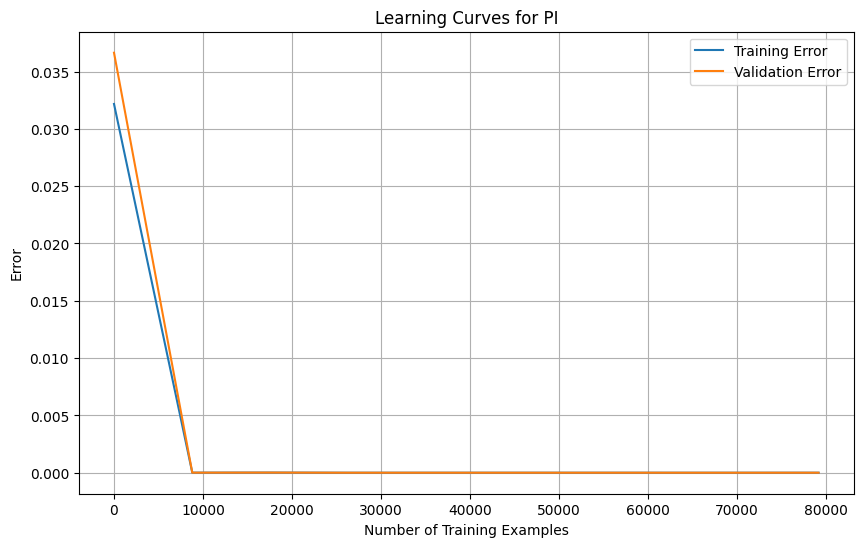

Finished training for PI.


In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

# Function to plot learning curves
def plot_learning_curves(train_sizes, train_errors, test_errors, target):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Validation Error')
    plt.title(f'Base LSTM model Learning Curves for {target}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Check for data issues
print("Missing values:", merged_dataset.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Reshape data for LSTM: from (samples, features) to (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Iterate over each target variable
for target in target_variables:
    print(f'\nTraining LSTM model for {target}...\n')

    # Define the target variable (y)
    y = merged_dataset[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Prepare to collect training and validation errors
    train_sizes = []
    train_errors = []
    test_errors = []

    # Create a base LSTM model without dropout and batch normalization
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mse')  # Default learning rate for Adam

    # Train the LSTM model with different training sizes
    for i in range(20, len(X_train), max(1, len(X_train) // 10)):
        # Sample the training data
        X_train_sample = X_train[:i]
        y_train_sample = y_train[:i]

        # Train the model
        print(f"Training model with {i} samples...")
        history = model.fit(X_train_sample, y_train_sample, epochs=50, verbose=0, validation_split=0.2)

        # Predictions on training and test sets
        y_train_pred = model.predict(X_train_sample)
        y_test_pred = model.predict(X_test)

        # Calculate errors
        train_error = mean_squared_error(y_train_sample, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Store the errors
        train_sizes.append(i)
        train_errors.append(train_error)
        test_errors.append(test_error)

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, target)

    print(f"Finished training for {target}.")

# ADRESSING ISSUES IN LSTM MODEL (OVERFITTING)
 Bascally adding drop out layers, adjusting the learning rate, batch normalisation and early stopping


Missing values: saleable_area(ft^2)      0
unit_rate                0
scaled_unix_timestamp    0
CG                       0
CI                       0
CPI                      0
GDP                      0
HS                       0
IR                       0
LTV                      0
M3                       0
MW                       0
PG                       0
PI                       0
SD                       0
SM                       0
SOLD                     0
UR                       0
new_price                0
dtype: int64

Training LSTM model for new_price...

Training model with 20 samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 8811 samples...
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 17602 samples...
551/551 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 26393 samples...
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s

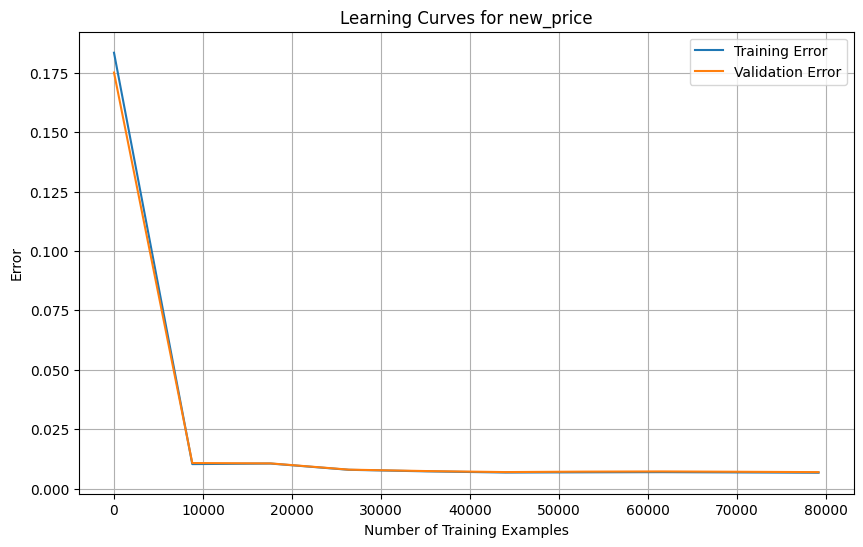

Finished training for new_price.

Training LSTM model for PI...

Training model with 20 samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 8811 samples...
276/276 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 17602 samples...
551/551 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training model with 26393 samples...
825/825 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Training model with 35184 samples...
1100/1100 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 43975 samples...
1375/1375 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 52766 samples...
1649/1649 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
687/687 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Training model with 61557 samples...
1924/1924 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
687/687 ━━━━━━━━━━━━━━

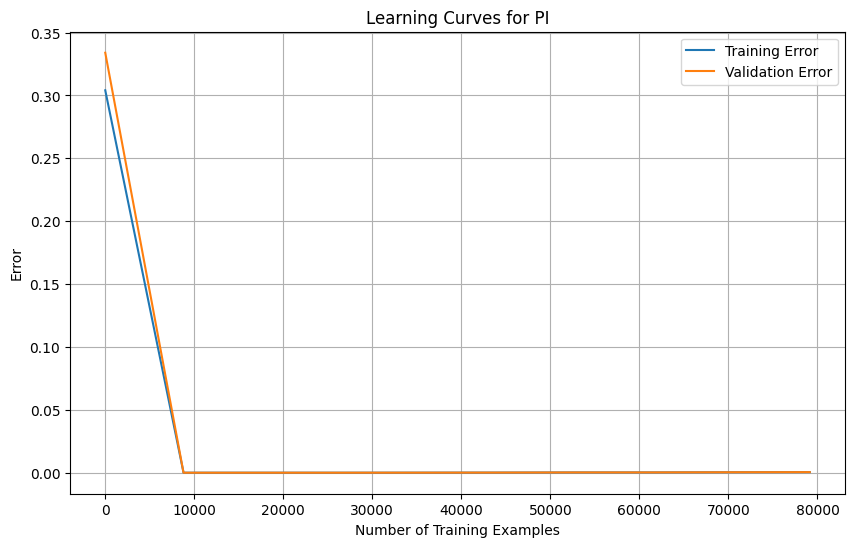

Finished training for PI.


In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Function to plot learning curves
def plot_learning_curves(train_sizes, train_errors, test_errors, target):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Validation Error')
    plt.title(f'Deal with Overfitting LSTM Learning Curves for {target}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Check for data issues
print("Missing values:", merged_dataset.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Reshape data for LSTM: from (samples, features) to (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Iterate over each target variable
for target in target_variables:
    print(f'\nTraining LSTM model for {target}...\n')

    # Define the target variable (y)
    y = merged_dataset[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Prepare to collect training and validation errors
    train_sizes = []
    train_errors = []
    test_errors = []

    # Create an LSTM model with dropout and batch normalization
    model = Sequential()
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # Train the LSTM model with different training sizes
    for i in range(20, len(X_train), max(1, len(X_train) // 10)):
        # Sample the training data
        X_train_sample = X_train[:i]
        y_train_sample = y_train[:i]

        # Train the model
        print(f"Training model with {i} samples...")
        history = model.fit(X_train_sample, y_train_sample, epochs=50, verbose=0, validation_split=0.2, callbacks=[early_stopping])

        # Predictions on training and test sets
        y_train_pred = model.predict(X_train_sample)
        y_test_pred = model.predict(X_test)

        # Calculate errors
        train_error = mean_squared_error(y_train_sample, y_train_pred)
        test_error = mean_squared_error(y_test, y_test_pred)

        # Store the errors
        train_sizes.append(i)
        train_errors.append(train_error)
        test_errors.append(test_error)

    # Plot learning curves
    plot_learning_curves(train_sizes, train_errors, test_errors, target)

    print(f"Finished training for {target}.")

# Using the LSTM using the "scaled timestamp"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Function to plot learning curves
def plot_learning_curves(train_sizes, train_errors, test_errors, target):
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_errors, label='Training Error')
    plt.plot(train_sizes, test_errors, label='Validation Error')
    plt.title(f'LSTM Learning Curves for {target}')
    plt.xlabel('Number of Training Examples')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    plt.show()

# Function to create dataset with time steps
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Check for data issues
print("Missing values:", merged_dataset.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Create dataset with specified time steps
time_steps = 10
X, y = create_dataset(X_scaled, time_steps)
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))  # Reshape for LSTM

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Create an LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the LSTM model
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[early_stopping])

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Training Error: {train_error}, Test Error: {test_error}")

# Plot learning curves
# (Add logic here to plot learning curves if needed)

# HYPERPARAMETER TUNING of LSTM MODEL
Using KerasRegressor wrapper and compare the results with the base model

In [104]:
pip install numpy matplotlib scikit-learn tensorflow keras

In [106]:
pip install keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin

# Function to create the LSTM model
def create_model(lstm_units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(lstm_units, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mse')  # Default learning rate for Adam
    return model

# Custom KerasRegressor wrapper
class KerasRegressorCustom(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn, lstm_units=50, dropout_rate=0.2, learning_rate=0.001, epochs=50, batch_size=32, **kwargs):
        self.build_fn = build_fn
        self.lstm_units = lstm_units
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.kwargs = kwargs
        self.model = None

    def fit(self, X, y, **fit_kwargs):
        self.model = self.build_fn(lstm_units=self.lstm_units,
                                    dropout_rate=self.dropout_rate,
                                    learning_rate=self.learning_rate,
                                    **self.kwargs)
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, **fit_kwargs)
        return self

    def predict(self, X):
        return self.model.predict(X)

# Check for data issues
print("Missing values:", merged_dataset.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Reshape data for LSTM: from (samples, features) to (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Iterate over each target variable
for target in target_variables:
    print(f'\nTraining LSTM model for {target}...\n')

    # Define the target variable (y)
    y = merged_dataset[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Hyperparameter tuning
    model = KerasRegressorCustom(build_fn=create_model, verbose=0)

    param_distributions = {
        'lstm_units': [30, 50, 70],
        'dropout_rate': [0.1, 0.2, 0.3],
        'epochs': [30, 50],
        'batch_size': [16, 32],
        'learning_rate': [0.0001, 0.001, 0.01]
    }

    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                       n_iter=10, n_jobs=-1, cv=3, verbose=1)

    # Fit the Random Search
    random_search.fit(X_train, y_train)
    print(f"Best parameters from Random Search: {random_search.best_params_}")

    # Use the best model to evaluate on the test set
    y_test_pred = random_search.best_estimator_.predict(X_test)
    test_error = mean_squared_error(y_test, y_test_pred)
    print(f"Test Error for the best model: {test_error}")

Missing values: saleable_area(ft^2)      0
unit_rate                0
scaled_unix_timestamp    0
CG                       0
CI                       0
CPI                      0
GDP                      0
HS                       0
IR                       0
LTV                      0
M3                       0
MW                       0
PG                       0
PI                       0
SD                       0
SM                       0
SOLD                     0
UR                       0
new_price                0
dtype: int64

Training LSTM model for new_price...

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/30
5495/5495 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0178
Epoch 2/30
5495/5495 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0084
Epoch 3/30
5495/5495 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0075
Epoch 4/30
5495/5495 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0067
Epoch 5/30
5495/5495 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0063
Epoch 6/

# CONFUSION MATRIX

(Check as used for a classiifcation problem)

# ASSEMBLING TECHNIQUES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from keras.callbacks import EarlyStopping

# Function to create the LSTM model
def create_model(lstm_units=50, dropout_rate=0.2, learning_rate=0.001):
    model = Sequential()
    model.add(LSTM(lstm_units, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(lstm_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mse')  # Default learning rate for Adam
    return model

# Custom KerasRegressor wrapper
class KerasRegressorCustom(BaseEstimator, RegressorMixin):
    def __init__(self, build_fn, lstm_units=50, dropout_rate=0.2, learning_rate=0.001, epochs=50, batch_size=32, **kwargs):
        if lstm_units <= 0:
            raise ValueError("lstm_units must be a positive integer.")
        if not (0 <= dropout_rate < 1):
            raise ValueError("dropout_rate must be between 0 and 1.")
        self.build_fn = build_fn
        self.lstm_units = lstm_units
        self.dropout_rate = dropout_rate
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.batch_size = batch_size
        self.kwargs = kwargs
        self.model = None

    def fit(self, X, y, **fit_kwargs):
        print(f"Fitting model with parameters: lstm_units={self.lstm_units}, dropout_rate={self.dropout_rate}, epochs={self.epochs}, batch_size={self.batch_size}")
        self.model = self.build_fn(lstm_units=self.lstm_units,
                                    dropout_rate=self.dropout_rate,
                                    learning_rate=self.learning_rate,
                                    **self.kwargs)
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        try:
            self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, validation_split=0.2, callbacks=[early_stopping], **fit_kwargs)
        except Exception as e:
            print(f"Error during model fitting: {e}")
            raise
        return self

    def predict(self, X):
        return self.model.predict(X)

# Check for data issues
print("Missing values:", merged_dataset.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Reshape data for LSTM: from (samples, features) to (samples, timesteps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Iterate over each target variable
for target in target_variables:
    print(f'\nTraining LSTM model for {target}...\n')

    # Define the target variable (y)
    y = merged_dataset[target]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Hyperparameter tuning
    model = KerasRegressorCustom(build_fn=create_model)

    param_distributions = {
        'lstm_units': [30, 50, 70],
        'dropout_rate': [0.1, 0.2, 0.3],
        'epochs': [30, 50],
        'batch_size': [16, 32],
        'learning_rate': [0.0001, 0.001, 0.01]
    }

    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_distributions,
                                       n_iter=10, n_jobs=-1, cv=3, verbose=1)

    # Fit the Random Search
    random_search.fit(X_train, y_train)
    print(f"Best parameters from Random Search: {random_search.best_params_}")

    # Use the best model to evaluate on the test set
    y_test_pred = random_search.best_estimator_.predict(X_test)
    test_error = mean_squared_error(y_test, y_test_pred)
    print(f"Test Error for the best model: {test_error}")